In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pooch
import os
import tempfile
import pandas as pd
import s3fs
import boto3
import botocore
import datetime

In [3]:
###SECCIÓN SACADA DEL CURSO DE CLIMATEMATCH ACADEMY

def pooch_load(filelocation=None,filename=None,processor=None):
    shared_location='/home/jovyan/shared/Data/Projects/Precipitation'
    user_temp_cache=tempfile.gettempdir()

    if os.path.exists(os.path.join(shared_location,filename)):
        file = os.path.join(shared_location,filename)
    else:
        file = pooch.retrieve(filelocation,known_hash=None,fname=os.path.join(user_temp_cache,filename),processor=processor)

    return file

In [4]:
years = range(1981,2015) #Años del estudio
file_paths = ['https://data.chc.ucsb.edu/products/CHIRPS-2.0/global_daily/netcdf/p05/chirps-v2.0.' + str(year) + '.days_p05.nc' for year in years] #formato de los archivos
filenames = ['chirps-v2.0.'+str(year)+'days_p05.nc' for year in years]

downloaded_files=[ pooch_load(fpath,fname) for (fpath,fname) in zip(file_paths,filenames)] #descarga de cada archivo

####Abrimos la data con xarray
chirps_data = xr.open_mfdataset(
    downloaded_files, combine="by_coords")

chirps_data

<xarray.Dataset> Size: 715GB
Dimensions:    (time: 12418, latitude: 2000, longitude: 7200)
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31
Data variables:
    precip     (time, latitude, longitude) float32 715GB dask.array<chunksize=(20, 112, 400), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [5]:
for f in downloaded_files:
    print(f)

C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1981days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1982days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1983days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1984days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1985days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1986days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1987days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1988days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1989days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1990days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1991days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1992days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1993days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1994days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chirps-v2.0.1995days_p05.nc
C:\Users\mariosb\AppData\Local\Temp\chir

In [6]:
chirps_data

<xarray.Dataset> Size: 715GB
Dimensions:    (time: 12418, latitude: 2000, longitude: 7200)
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31
Data variables:
    precip     (time, latitude, longitude) float32 715GB dask.array<chunksize=(20, 112, 400), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/chg/products/CH...
    website:           http://chg.geog.ucsb.edu/data/chirps/index.html
    faq:               http://chg-wiki.geog.ucsb.edu/wiki/CHIRPS_FAQ

In [7]:
print(chirps_data)

<xarray.Dataset> Size: 715GB
Dimensions:    (time: 12418, latitude: 2000, longitude: 7200)
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31
Data variables:
    precip     (time, latitude, longitude) float32 715GB dask.array<chunksize=(20, 112, 400), meta=np.ndarray>
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2015-11-20
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given day.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url

In [8]:
print(chirps_data.data_vars)  # variables del dataset
print(chirps_data.coords)     # coordenadas disponibles

Data variables:
    precip   (time, latitude, longitude) float32 715GB dask.array<chunksize=(20, 112, 400), meta=np.ndarray>
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31


In [9]:
print(chirps_data['precip'])
print(chirps_data['precip'].isel(time=0))  # primer día

<xarray.DataArray 'precip' (time: 12418, latitude: 2000, longitude: 7200)> Size: 715GB
dask.array<concatenate, shape=(12418, 2000, 7200), dtype=float32, chunksize=(20, 112, 400), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0
<xarray.DataArray 'precip' (latitude: 2000, longitude: 7200)> Size: 58MB
dask.array<getitem, shape=(2000, 7200), dtype=float32, chunksize=(112, 400), chunktype=numpy.ndarray>
Coordinates:
  * latitude   (latitude)

In [10]:
jauja = chirps_data.sel(latitude=-11.78663, longitude=-75.48687, method="nearest")
jauja_precip = jauja["precip"]
jauja_precip

<xarray.DataArray 'precip' (time: 12418)> Size: 50kB
dask.array<getitem, shape=(12418,), dtype=float32, chunksize=(20,), chunktype=numpy.ndarray>
Coordinates:
    latitude   float32 4B -11.78
    longitude  float32 4B -75.48
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

Text(0.5, 0, 'Año')

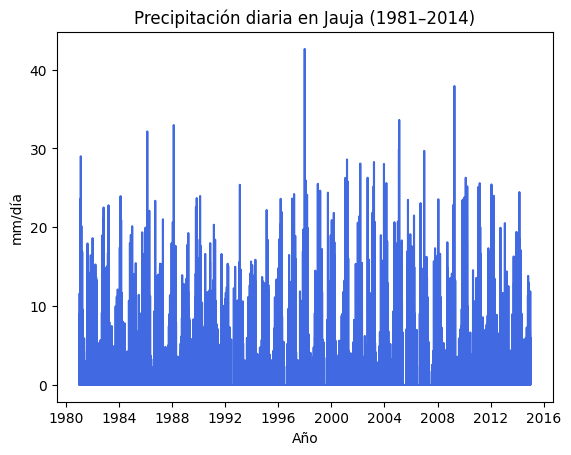

In [11]:
jauja_precip.plot(color="royalblue")
plt.title("Precipitación diaria en Jauja (1981–2014)")
plt.ylabel("mm/día")
plt.xlabel("Año")

In [12]:
# Sumar la precipitación diaria para obtener precipitación mensual
jauja_precip_mensual = jauja_precip.resample(time="M").sum()

c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [13]:
jauja_precip.head()

<xarray.DataArray 'precip' (time: 5)> Size: 20B
dask.array<getitem, shape=(5,), dtype=float32, chunksize=(5,), chunktype=numpy.ndarray>
Coordinates:
    latitude   float32 4B -11.78
    longitude  float32 4B -75.48
  * time       (time) datetime64[ns] 40B 1981-01-01 1981-01-02 ... 1981-01-05
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

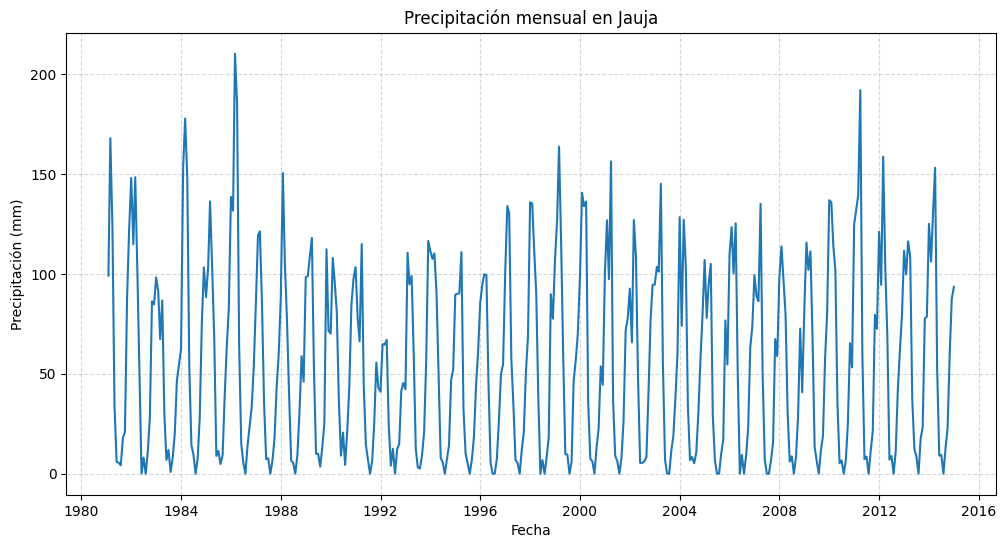

In [14]:
plt.figure(figsize=(12,6))
jauja_precip_mensual.plot()
plt.title("Precipitación mensual en Jauja")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Fecha")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [15]:
huancane = chirps_data.sel(latitude=-15.20686, longitude=-69.75831, method="nearest")
huancane_precip = huancane["precip"]
huancane_precip

<xarray.DataArray 'precip' (time: 12418)> Size: 50kB
dask.array<getitem, shape=(12418,), dtype=float32, chunksize=(20,), chunktype=numpy.ndarray>
Coordinates:
    latitude   float32 4B -15.23
    longitude  float32 4B -69.78
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

Text(0.5, 0, 'Año')

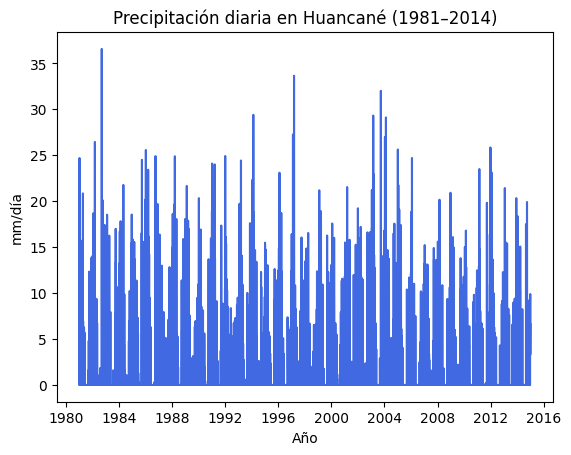

In [16]:
huancane_precip.plot(color="royalblue")
plt.title("Precipitación diaria en Huancané (1981–2014)")
plt.ylabel("mm/día")
plt.xlabel("Año")

In [17]:
huancane_precip_mensual = huancane_precip.resample(time="M").sum()

c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


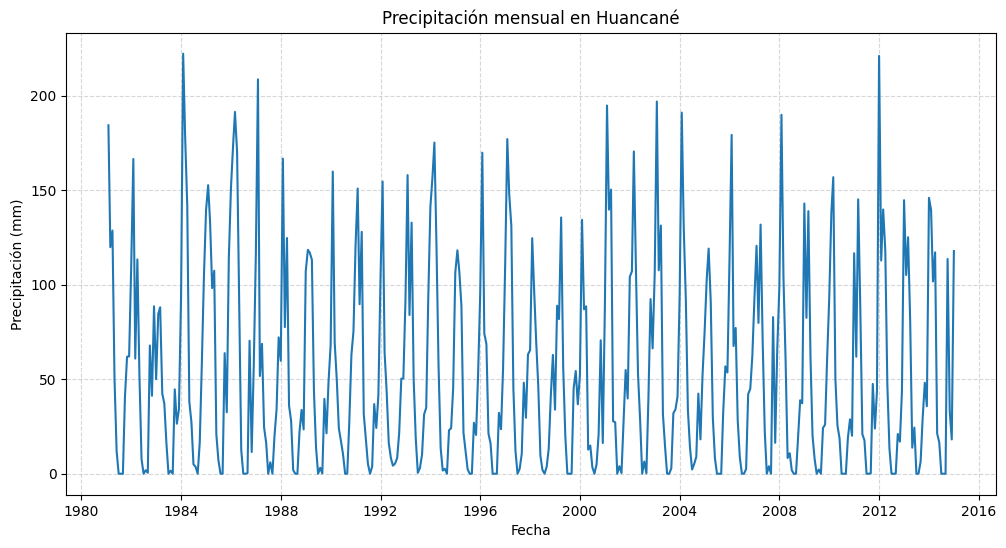

In [18]:
plt.figure(figsize=(12,6))
huancane_precip_mensual.plot()
plt.title("Precipitación mensual en Huancané")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Fecha")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [19]:
pucallpa = chirps_data.sel(latitude=-6.45278, longitude=-75.84556, method="nearest")
pucallpa_precip = pucallpa["precip"]
pucallpa_precip

<xarray.DataArray 'precip' (time: 12418)> Size: 50kB
dask.array<getitem, shape=(12418,), dtype=float32, chunksize=(20,), chunktype=numpy.ndarray>
Coordinates:
    latitude   float32 4B -6.475
    longitude  float32 4B -75.83
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

Text(0.5, 0, 'Año')

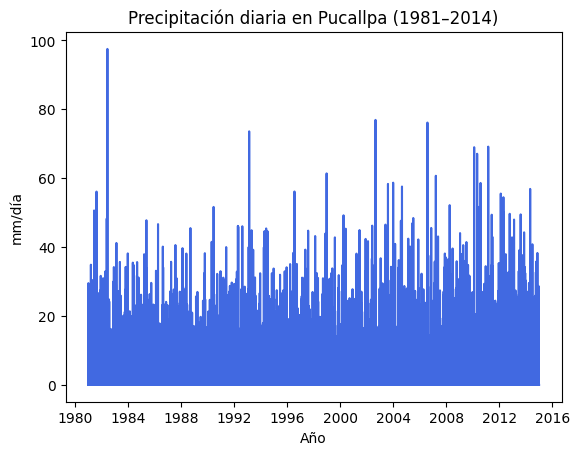

In [20]:
pucallpa_precip.plot(color="royalblue")
plt.title("Precipitación diaria en Pucallpa (1981–2014)")
plt.ylabel("mm/día")
plt.xlabel("Año")

In [21]:
# Sumar la precipitación diaria para obtener precipitación mensual
pucallpa_precip_mensual = pucallpa_precip.resample(time="M").sum()

c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


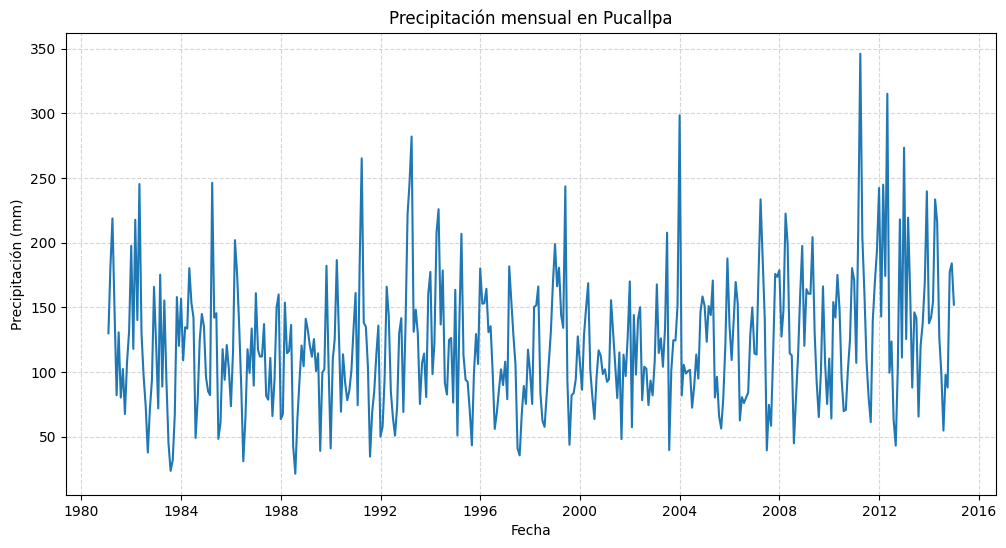

In [22]:
plt.figure(figsize=(12,6))
pucallpa_precip_mensual.plot()
plt.title("Precipitación mensual en Pucallpa")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Fecha")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [23]:
tingomaria = chirps_data.sel(latitude=-9.31017, longitude=-76.00050, method="nearest")
tingomaria_precip = tingomaria["precip"]
tingomaria_precip

<xarray.DataArray 'precip' (time: 12418)> Size: 50kB
dask.array<getitem, shape=(12418,), dtype=float32, chunksize=(20,), chunktype=numpy.ndarray>
Coordinates:
    latitude   float32 4B -9.325
    longitude  float32 4B -76.03
  * time       (time) datetime64[ns] 99kB 1981-01-01 1981-01-02 ... 2014-12-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

Text(0.5, 0, 'Año')

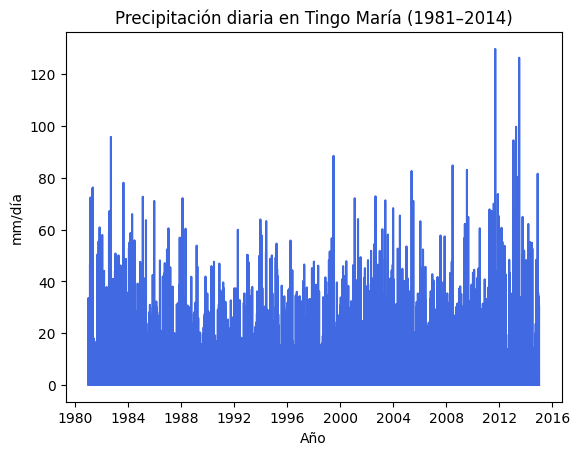

In [24]:
tingomaria_precip.plot(color="royalblue")
plt.title("Precipitación diaria en Tingo María (1981–2014)")
plt.ylabel("mm/día")
plt.xlabel("Año")

In [25]:
# Sumar la precipitación diaria para obtener precipitación mensual
tingomaria_precip_mensual = tingomaria_precip.resample(time="M").sum()

c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


In [26]:
tingomaria_precip_mensual.head()

<xarray.DataArray 'precip' (time: 5)> Size: 20B
dask.array<getitem, shape=(5,), dtype=float32, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
    latitude   float32 4B -9.325
    longitude  float32 4B -76.03
  * time       (time) datetime64[ns] 40B 1981-01-31 1981-02-28 ... 1981-05-31
Attributes:
    units:               mm/day
    standard_name:       convective precipitation rate
    long_name:           Climate Hazards group InfraRed Precipitation with St...
    time_step:           day
    geostatial_lat_min:  -50.0
    geostatial_lat_max:  50.0
    geostatial_lon_min:  -180.0
    geostatial_lon_max:  180.0

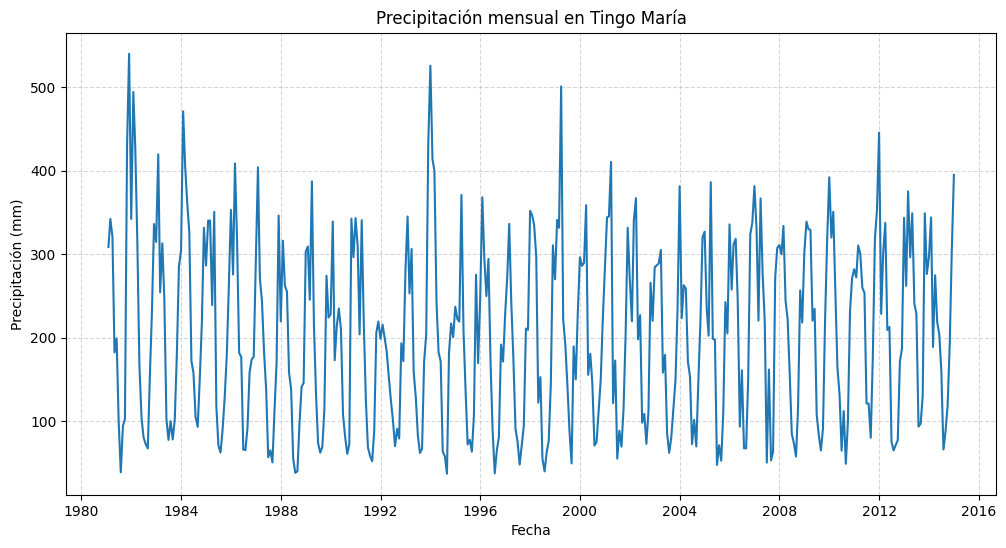

In [27]:
plt.figure(figsize=(12,6))
tingomaria_precip_mensual.plot()
plt.title("Precipitación mensual en Tingo María")
plt.ylabel("Precipitación (mm)")
plt.xlabel("Fecha")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

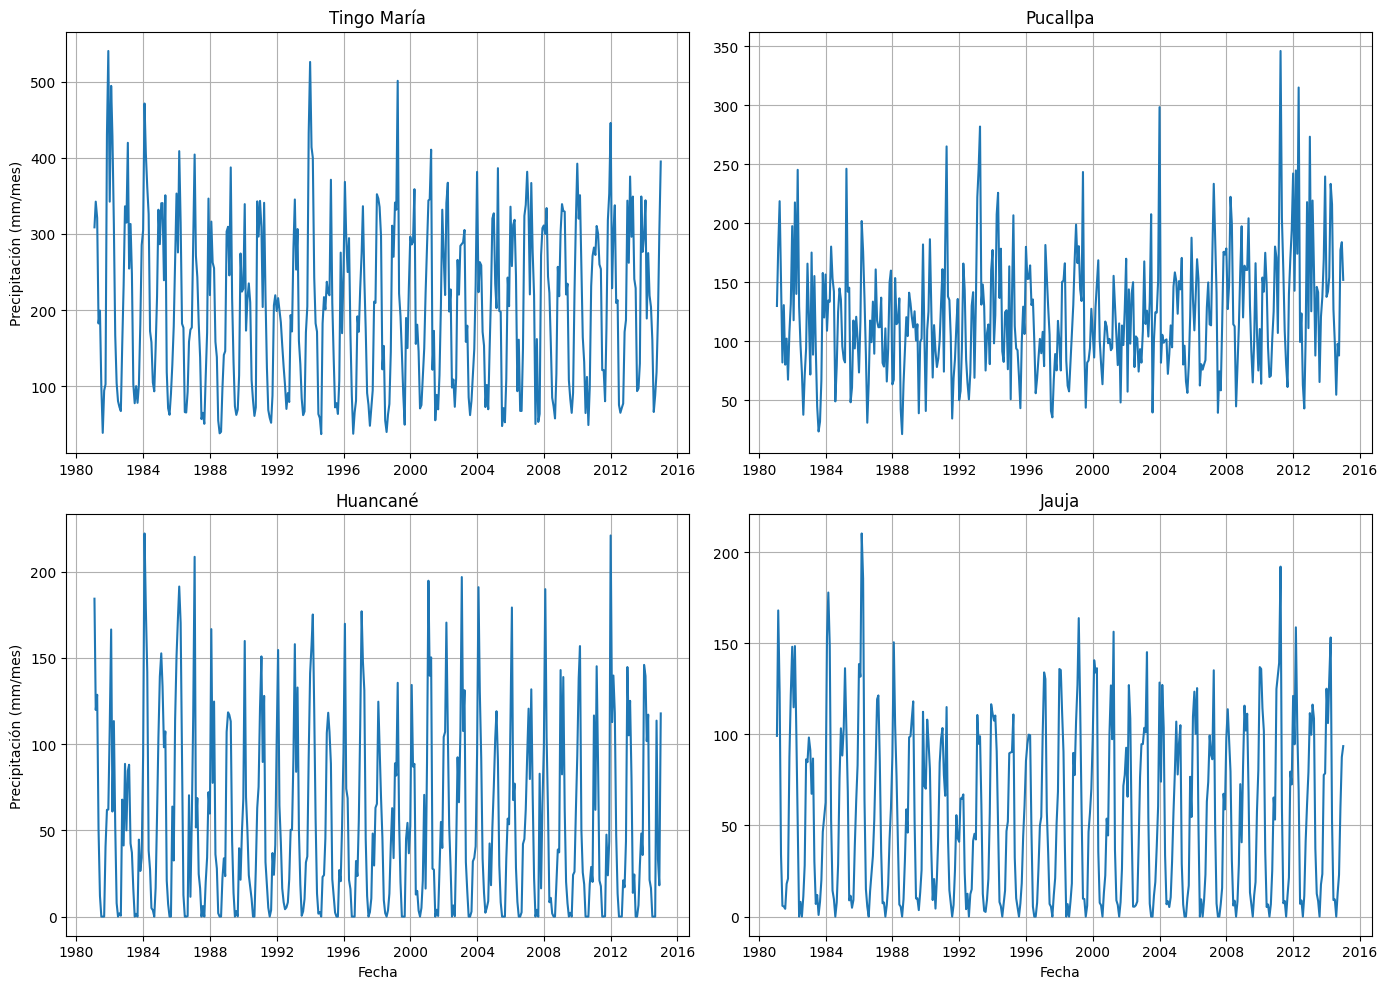

In [28]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# --- Tingo María ---
axes[0, 0].plot(tingomaria_precip_mensual.time.values,
                tingomaria_precip_mensual.values)
axes[0, 0].set_title("Tingo María")
axes[0, 0].set_ylabel("Precipitación (mm/mes)")
axes[0, 0].grid(True)

# --- Pucallpa ---
axes[0, 1].plot(pucallpa_precip_mensual.time.values,
                pucallpa_precip_mensual.values)
axes[0, 1].set_title("Pucallpa")
axes[0, 1].grid(True)

# --- Huancané ---
axes[1, 0].plot(huancane_precip_mensual.time.values,
                huancane_precip_mensual.values)
axes[1, 0].set_title("Huancané")
axes[1, 0].set_ylabel("Precipitación (mm/mes)")
axes[1, 0].set_xlabel("Fecha")
axes[1, 0].grid(True)

# --- Jauja ---
axes[1, 1].plot(jauja_precip_mensual.time.values,
                jauja_precip_mensual.values)
axes[1, 1].set_title("Jauja")
axes[1, 1].set_xlabel("Fecha")
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


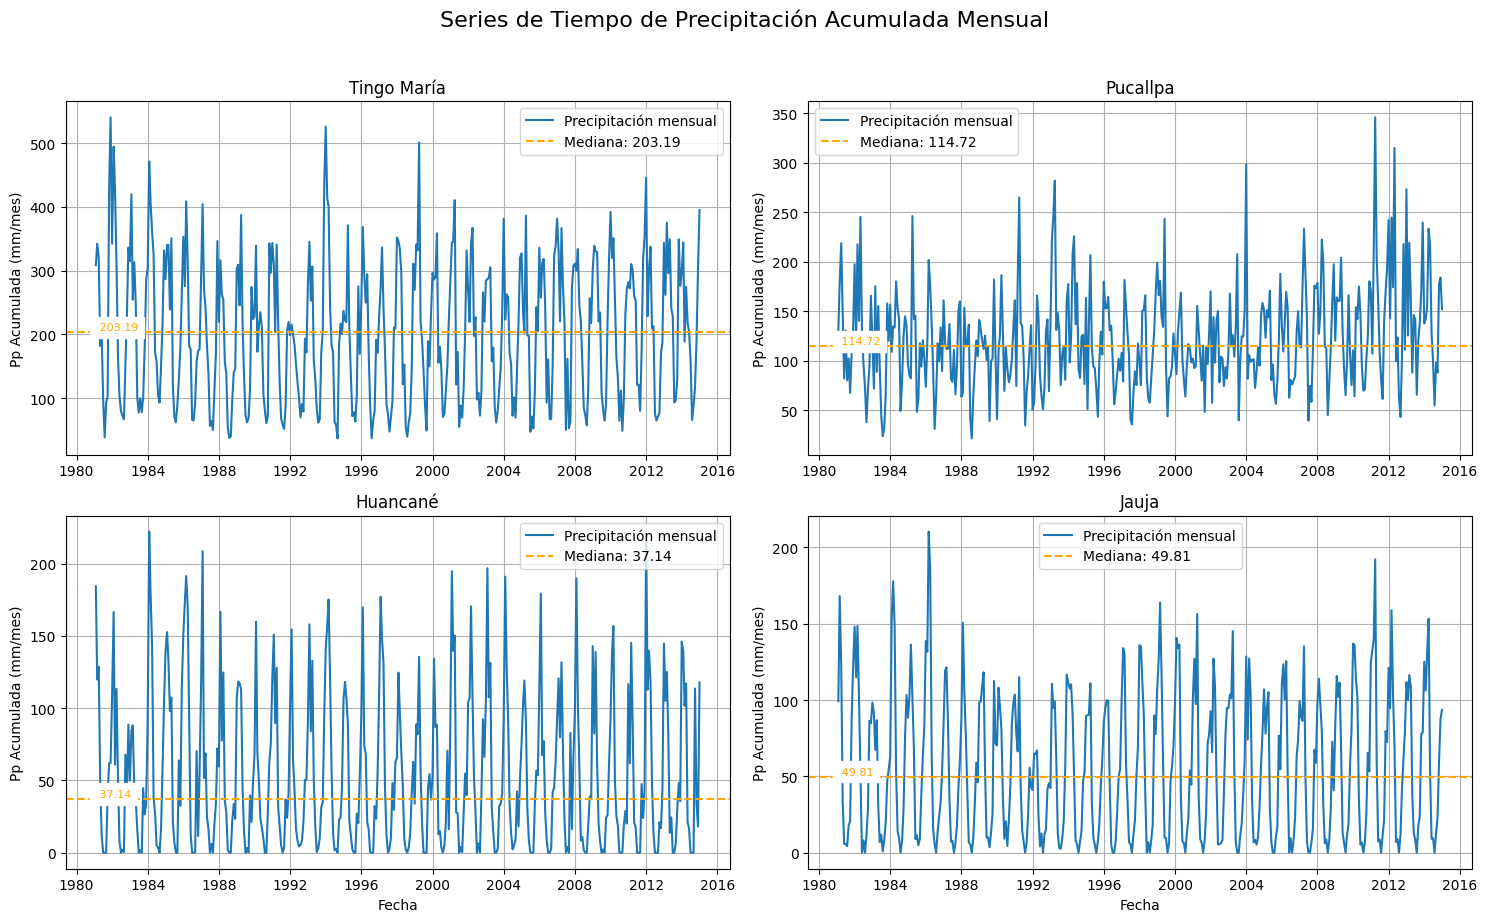

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# ---- Función para graficar cada estación con estilo uniforme ----
def plot_estacion(ax, time, values, nombre):
    median = np.nanmedian(values)

    ax.plot(time, values, label="Precipitación mensual")

    # Mediana
    ax.axhline(y=median, color="orange", linestyle='--', label=f"Mediana: {median:.2f}")
    ax.text(time[0], median, f" {median:.2f}", 
            va='bottom', ha='left', fontsize=8, color="orange",  backgroundcolor="white")

    ax.set_title(f"{nombre}", fontsize=12)
    ax.set_ylabel("Pp Acumulada (mm/mes)")
    ax.grid(True)
    ax.legend()


# ---- Figura general ----
fig, axes = plt.subplots(2, 2, figsize=(15, 9))

# --- Tingo María ---
plot_estacion(
    axes[0, 0],
    tingomaria_precip_mensual.time.values,
    tingomaria_precip_mensual.values,
    "Tingo María"
)

# --- Pucallpa ---
plot_estacion(
    axes[0, 1],
    pucallpa_precip_mensual.time.values,
    pucallpa_precip_mensual.values,
    "Pucallpa"
)

# --- Huancané ---
plot_estacion(
    axes[1, 0],
    huancane_precip_mensual.time.values,
    huancane_precip_mensual.values,
    "Huancané"
)
axes[1, 0].set_xlabel("Fecha")

# --- Jauja ---
plot_estacion(
    axes[1, 1],
    jauja_precip_mensual.time.values,
    jauja_precip_mensual.values,
    "Jauja"
)
axes[1, 1].set_xlabel("Fecha")

# --- Título general ---
plt.suptitle("Series de Tiempo de Precipitación Acumulada Mensual", 
             fontsize=16, y=1.02)

plt.tight_layout()
plt.show()


In [30]:
import numpy as np

# Tingo María
TM_P95 = tingomaria_precip.resample(time="Y").reduce(np.nanpercentile, q=95)
TM_P99 = tingomaria_precip.resample(time="Y").reduce(np.nanpercentile, q=99)

# Pucallpa
PU_P95 = pucallpa_precip.resample(time="Y").reduce(np.nanpercentile, q=95)
PU_P99 = pucallpa_precip.resample(time="Y").reduce(np.nanpercentile, q=99)

# Huancané
HU_P95 = huancane_precip.resample(time="Y").reduce(np.nanpercentile, q=95)
HU_P99 = huancane_precip.resample(time="Y").reduce(np.nanpercentile, q=99)

# Jauja
JA_P95 = jauja_precip.resample(time="Y").reduce(np.nanpercentile, q=95)
JA_P99 = jauja_precip.resample(time="Y").reduce(np.nanpercentile, q=99)

c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(
c:\Users\mariosb\neuron\Lib\site-packages\xarray\groupers.py:530: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  self.index_grouper = pd.Grouper(


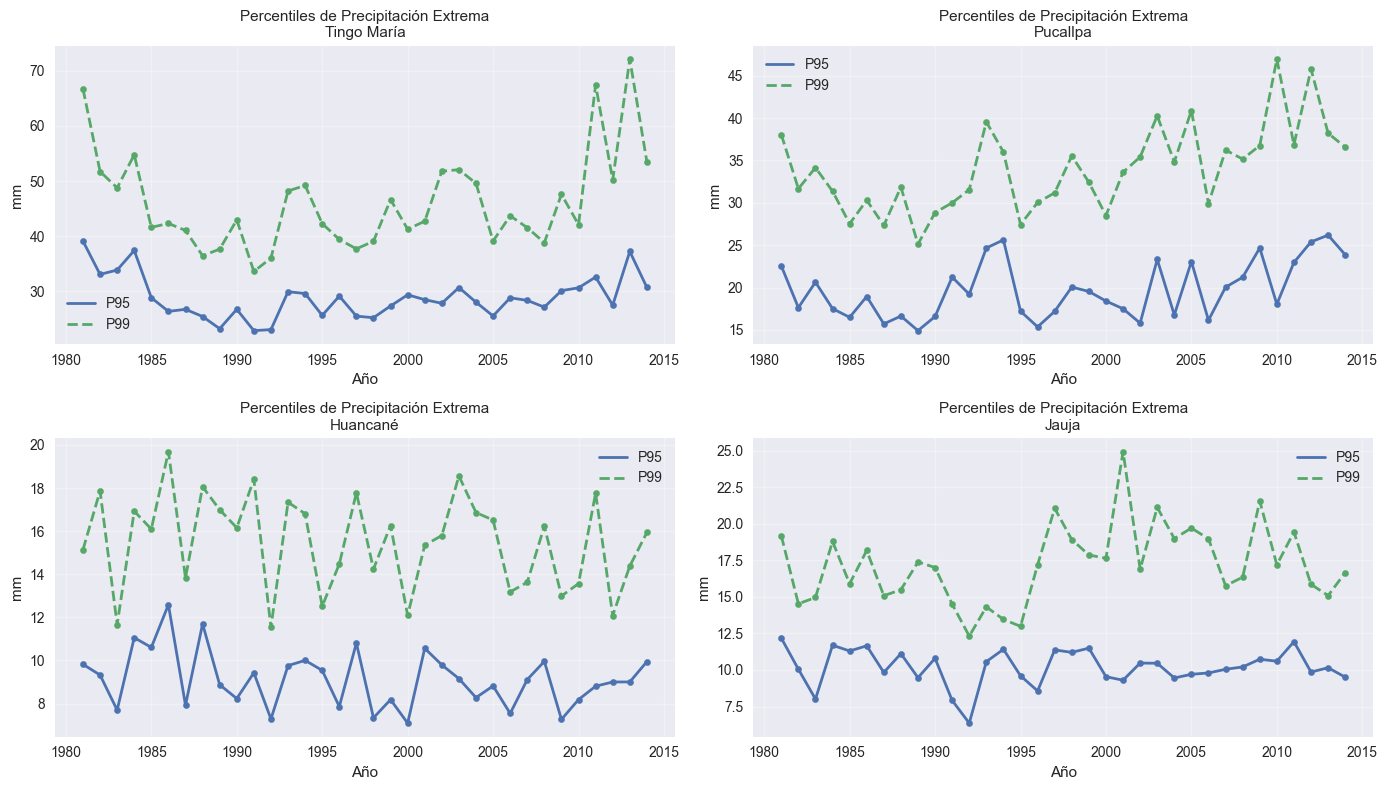

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Activar estilo de fondo similar al ejemplo
plt.style.use("seaborn-v0_8")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()

estaciones = {
    "Tingo María": (TM_P95, TM_P99),
    "Pucallpa": (PU_P95, PU_P99),
    "Huancané": (HU_P95, HU_P99),
    "Jauja": (JA_P95, JA_P99)
}

for ax, (nombre, (p95, p99)) in zip(axes, estaciones.items()):
    
    # Convertir a arreglos para graficar
    years = p95.time.dt.year.values
    P95_values = p95.values
    P99_values = p99.values

    # --- GRAFICAR ---
    ax.plot(years, P95_values, label="P95", linewidth=2)
    ax.plot(years, P99_values, label="P99", linewidth=2, linestyle="--")

    # --- PUNTOS ---
    ax.scatter(years, P95_values, s=20)
    ax.scatter(years, P99_values, s=20)

    # --- ESTILO ---
    ax.set_title(f"Percentiles de Precipitación Extrema\n{nombre}", fontsize=11)
    ax.set_xlabel("Año")
    ax.set_ylabel("mm")

    ax.grid(alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()


C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\1779841324.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(series, labels=labels, patch_artist=True)


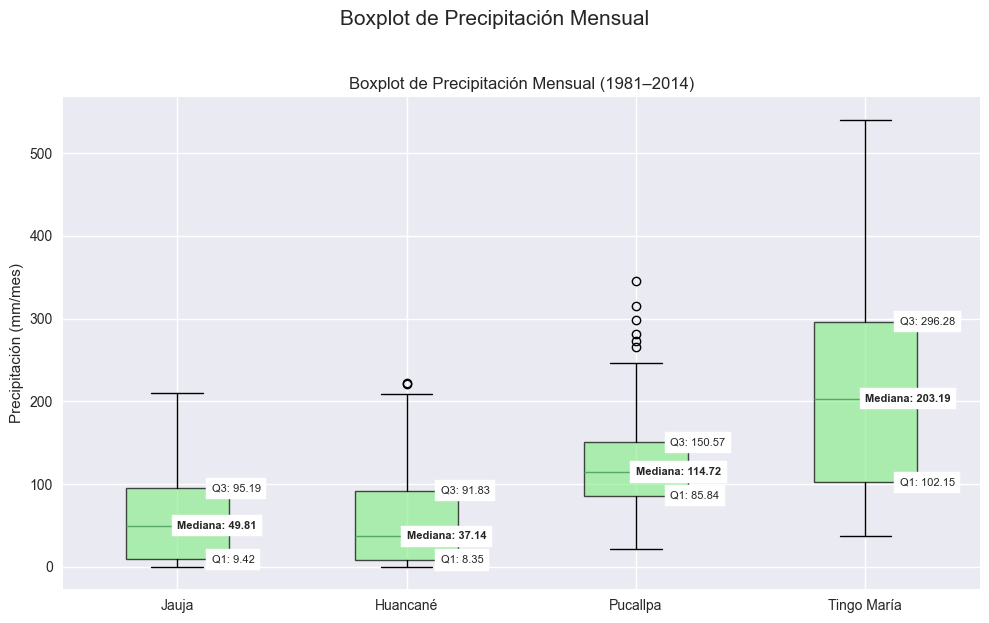

In [32]:
import matplotlib.pyplot as plt
import numpy as np

# --- Series mensuales ---
series = [
    jauja_precip_mensual.values,
    huancane_precip_mensual.values,
    pucallpa_precip_mensual.values,
    tingomaria_precip_mensual.values
]

labels = ["Jauja", "Huancané", "Pucallpa", "Tingo María"]

# --- Cálculo de Q1, Q2, Q3 ---
q1_list = [np.nanpercentile(s, 25) for s in series]
q2_list = [np.nanpercentile(s, 50) for s in series]
q3_list = [np.nanpercentile(s, 75) for s in series]

# --- Gráfico ---
fig, ax = plt.subplots(figsize=(10, 6))

bp = ax.boxplot(series, labels=labels, patch_artist=True)

# Color suave tipo SENAMHI
for box in bp['boxes']:
    box.set(facecolor='lightgreen', alpha=0.7)

ax.set_ylabel("Precipitación (mm/mes)")
ax.set_title("Boxplot de Precipitación Mensual (1981–2014)")

# --- Anotaciones Q1, Mediana, Q3 ---
for i, (q1, q2, q3) in enumerate(zip(q1_list, q2_list, q3_list), start=1):
    ax.text(i + 0.15, q1, f"Q1: {q1:.2f}", fontsize=8,
            backgroundcolor='white', va='center')
    ax.text(i, q2, f"Mediana: {q2:.2f}", fontsize=8,
            backgroundcolor='white', va='center', weight='bold')
    ax.text(i + 0.15, q3, f"Q3: {q3:.2f}", fontsize=8,
            backgroundcolor='white', va='center')

plt.suptitle("Boxplot de Precipitación Mensual", fontsize=15, y=1.03)

plt.tight_layout()
plt.show()

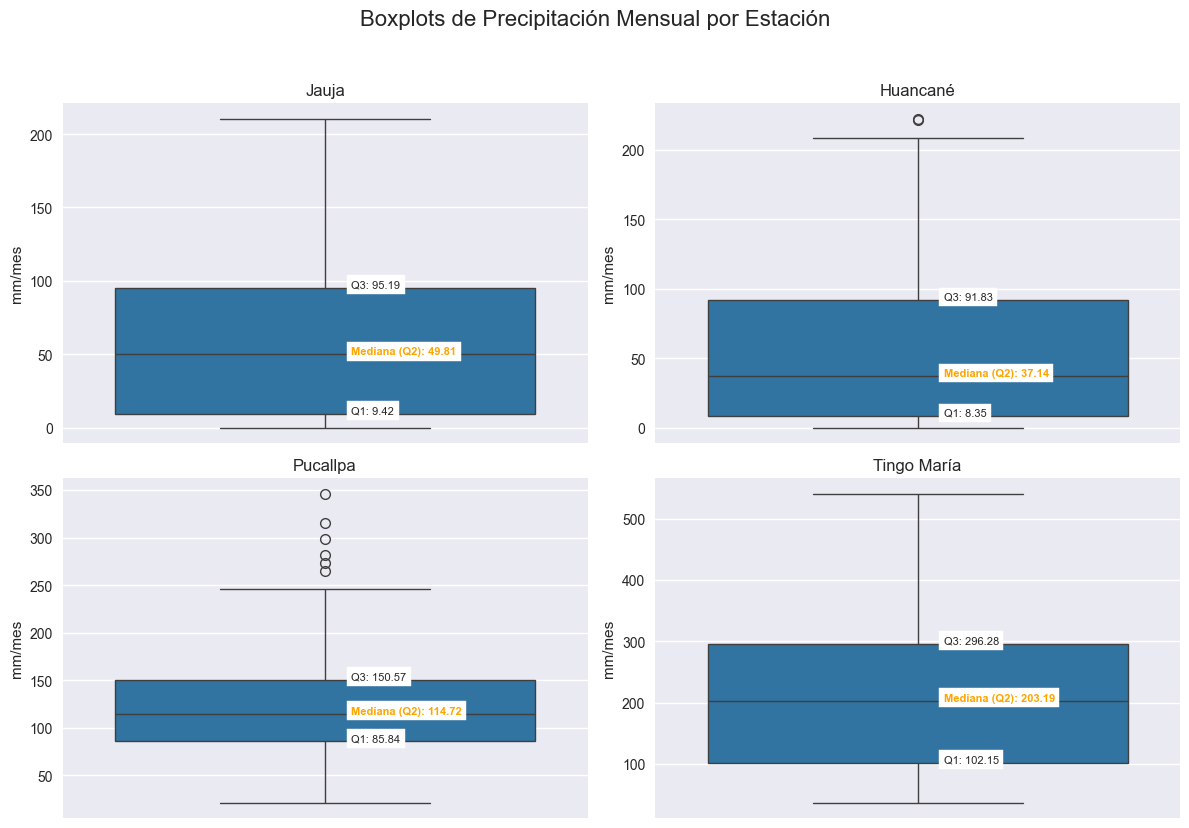

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style("darkgrid") 
# --- Preparar datos ---
data_dict = {
    "Jauja": jauja_precip_mensual.values,
    "Huancané": huancane_precip_mensual.values,
    "Pucallpa": pucallpa_precip_mensual.values,
    "Tingo María": tingomaria_precip_mensual.values
}

# --- Crear figura con 4 subplots ---
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

# --- Color azul ---
color_box ="#1f77b4"   # azul matplotlib (bonito)
color_median = "orange"

for ax, (nombre, serie) in zip(axes, data_dict.items()):

    # Boxplot
    sns.boxplot(y=serie, ax=ax, color=color_box)

    # Título por estación
    ax.set_title(f"{nombre}")

    # Calcular cuartiles
    q1 = np.nanpercentile(serie, 25)
    q2 = np.nanpercentile(serie, 50)
    q3 = np.nanpercentile(serie, 75)

    # --- Anotaciones como tu ejemplo ---
    ax.text(0.05, q1, f"Q1: {q1:.2f}", 
            backgroundcolor="white", fontsize=8, ha="left")
    ax.text(0.05, q2, f"Mediana (Q2): {q2:.2f}", 
            backgroundcolor="white", fontsize=8, color=color_median, ha="left", weight="bold")
    ax.text(0.05, q3, f"Q3: {q3:.2f}", 
            backgroundcolor="white", fontsize=8, ha="left")

    ax.set_ylabel("mm/mes")

# Título general
plt.suptitle("Boxplots de Precipitación Mensual por Estación", 
             fontsize=16, y=1.03)

plt.tight_layout()
plt.show()


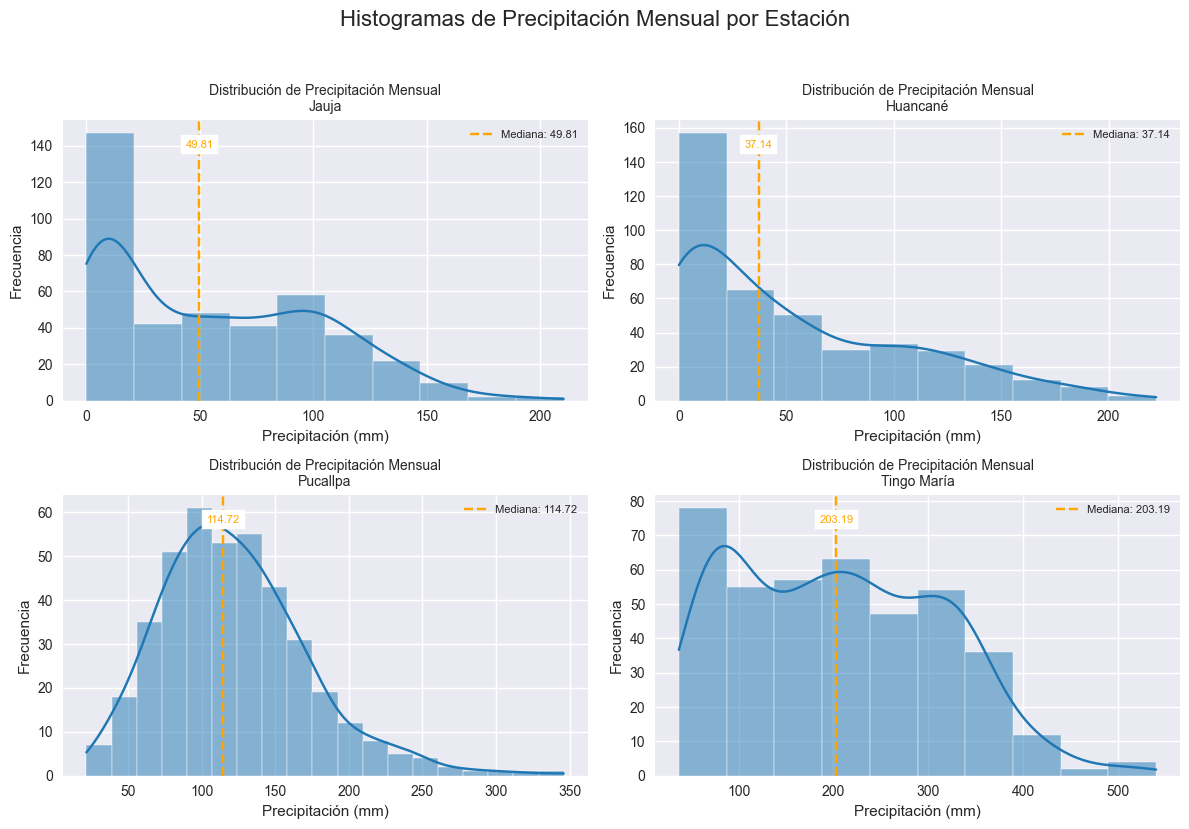

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
axes = axes.flatten()

for ax, (estacion, data) in zip(axes, data_dict.items()):
    
    data = np.array(data)
    median = np.median(data)

    # Histograma + KDE
    sns.histplot(data, kde=True, ax=ax, color="#1f77b4")

    ax.set_title(f"Distribución de Precipitación Mensual\n{estacion}", fontsize=10)
    ax.set_xlabel("Precipitación (mm)")
    ax.set_ylabel("Frecuencia")

    # Línea de la mediana
    ax.axvline(median, color="orange", linestyle="--", label=f"Mediana: {median:.2f}")
    ax.text(
        median,
        ax.get_ylim()[1] * 0.9,
        f"{median:.2f}",
        color="orange",
        ha="center",
        backgroundcolor="white",
        fontsize=8
    )

    ax.legend(fontsize=8)

# Título general
plt.suptitle("Histogramas de Precipitación Mensual por Estación", 
             fontsize=16, y=1.03)
plt.tight_layout()
plt.show()


In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

df_total = pd.read_csv("C:/Users/mariosb/Desktop/TP2/datos_completos_Datos_tp2.csv")
df_total['Fecha'] = pd.to_datetime(df_total['Fecha'])

df_total.head()


Unnamed: 0      Fecha  tmax_obs  tmin_obs  pp_obs  tmax  tmin  pp  \
0           0 1963-11-01      14.0       8.0     0.0   NaN   NaN NaN   
1           1 1963-11-02      15.3       8.0     0.0   NaN   NaN NaN   
2           2 1963-11-03      16.0       8.0     0.0   NaN   NaN NaN   
3           3 1963-11-04      16.2       8.3     4.0   NaN   NaN NaN   
4           4 1963-11-05      16.4       9.0     1.0   NaN   NaN NaN   

  Tmax_origen  Tmax_completo Tmin_origen  Tmin_completo Pp_origen  \
0         obs           14.0         obs            8.0       obs   
1         obs           15.3         obs            8.0       obs   
2         obs           16.0         obs            8.0       obs   
3         obs           16.2         obs            8.3       obs   
4         obs           16.4         obs            9.0       obs   

   Pp_completo      Codigo    Nombre  Latitud  Longitud  Altitud (msnm)  
0          0.0  ho00000786  HUANCANE  -15.203   -69.763            3860  
1          0.0  ho00000786  HUANCANE  -15.203   -69.763            3860  
2          0.0  ho00000786  HUANCANE  -15.203   -69.763            3860  
3          4.0  ho00000786  HUANCANE  -15.203   -69.763            3860  
4          1.0  ho00000786  HUANCANE  -15.203   -69.763            3860

In [36]:

print("Fechas SENAMHI:", df_total['Fecha'].min(), "→", df_total['Fecha'].max())
print("Estaciones:", df_total['Nombre'].unique())

Fechas SENAMHI: 1940-01-01 00:00:00 → 2016-12-31 00:00:00
Estaciones: ['HUANCANE' 'JAUJA' 'PUCALLPA' 'TINGOMARIA']


In [37]:
df_total['Fecha'] = pd.to_datetime(df_total['Fecha'], errors='coerce')


df_total

Unnamed: 0      Fecha  tmax_obs  tmin_obs  pp_obs   tmax   tmin  \
0               0 1963-11-01      14.0       8.0     0.0    NaN    NaN   
1               1 1963-11-02      15.3       8.0     0.0    NaN    NaN   
2               2 1963-11-03      16.0       8.0     0.0    NaN    NaN   
3               3 1963-11-04      16.2       8.3     4.0    NaN    NaN   
4               4 1963-11-05      16.4       9.0     1.0    NaN    NaN   
...           ...        ...       ...       ...     ...    ...    ...   
84492       84492 2016-12-27       NaN       NaN     NaN  28.98  19.53   
84493       84493 2016-12-28       NaN       NaN     NaN  26.36  19.42   
84494       84494 2016-12-29       NaN       NaN     NaN  27.01  18.39   
84495       84495 2016-12-30       NaN       NaN     NaN  28.73  18.44   
84496       84496 2016-12-31       NaN       NaN     NaN  27.06  19.76   

              pp Tmax_origen  Tmax_completo Tmin_origen  Tmin_completo  \
0            NaN         obs      14.000000         obs       8.000000   
1            NaN         obs      15.300000         obs       8.000000   
2            NaN         obs      16.000000         obs       8.000000   
3            NaN         obs      16.200000         obs       8.300000   
4            NaN         obs      16.400000         obs       9.000000   
...          ...         ...            ...         ...            ...   
84492  40.324078       pisco      28.980000       pisco      19.530001   
84493  54.431740       pisco      26.360001       pisco      19.420000   
84494   0.536593       pisco      27.010000       pisco      18.389999   
84495   6.587807       pisco      28.730000       pisco      18.440001   
84496  22.971571       pisco      27.059999       pisco      19.760000   

      Pp_origen  Pp_completo      Codigo      Nombre  Latitud  Longitud  \
0           obs     0.000000  ho00000786    HUANCANE  -15.203   -69.763   
1           obs     0.000000  ho00000786    HUANCANE  -15.203   -69.763   
2           obs     0.000000  ho00000786    HUANCANE  -15.203   -69.763   
3           obs     4.000000  ho00000786    HUANCANE  -15.203   -69.763   
4           obs     1.000000  ho00000786    HUANCANE  -15.203   -69.763   
...         ...          ...         ...         ...      ...       ...   
84492     pisco    40.324078  ho00000468  TINGOMARIA   -9.288   -76.000   
84493     pisco    54.431740  ho00000468  TINGOMARIA   -9.288   -76.000   
84494     pisco     0.536593  ho00000468  TINGOMARIA   -9.288   -76.000   
84495     pisco     6.587807  ho00000468  TINGOMARIA   -9.288   -76.000   
84496     pisco    22.971571  ho00000468  TINGOMARIA   -9.288   -76.000   

       Altitud (msnm)  
0                3860  
1                3860  
2                3860  
3                3860  
4                3860  
...               ...  
84492             645  
84493             645  
84494             645  
84495             645  
84496             645  

[84497 rows x 19 columns]

In [38]:
hu_se = df_total[df_total["Nombre"] == "HUANCANE"].set_index("Fecha")["Pp_completo"]
ja_se = df_total[df_total["Nombre"] == "JAUJA"].set_index("Fecha")["Pp_completo"]
pu_se = df_total[df_total["Nombre"] == "PUCALLPA"].set_index("Fecha")["Pp_completo"]
tm_se = df_total[df_total["Nombre"] == "TINGOMARIA"].set_index("Fecha")["Pp_completo"]


In [39]:
import pandas as pd

tm_ch = pd.Series(tingomaria_precip.values, index=tingomaria_precip.time.values)
pu_ch = pd.Series(pucallpa_precip.values, index=pucallpa_precip.time.values)
hu_ch = pd.Series(huancane_precip.values, index=huancane_precip.time.values)
ja_ch = pd.Series(jauja_precip.values, index=jauja_precip.time.values)

df_chirps = pd.concat([tm_ch, pu_ch, hu_ch, ja_ch], axis=1)
df_chirps.columns = ["TingoMaria", "Pucallpa", "Huancane", "Jauja"]


In [40]:
corr_matrix = df_chirps.corr(method="pearson")
print(corr_matrix)

            TingoMaria  Pucallpa  Huancane     Jauja
TingoMaria    1.000000  0.232305  0.160167  0.297202
Pucallpa      0.232305  1.000000  0.057371  0.102213
Huancane      0.160167  0.057371  1.000000  0.247012
Jauja         0.297202  0.102213  0.247012  1.000000


In [41]:
hu_df = pd.concat([hu_ch, hu_se], axis=1).dropna()
ja_df = pd.concat([ja_ch, ja_se], axis=1).dropna()
pu_df = pd.concat([pu_ch, pu_se], axis=1).dropna()
tm_df = pd.concat([tm_ch, tm_se], axis=1).dropna()

ja_df.columns = ["CHIRPS", "SENAMHI"]
hu_df.columns = ["CHIRPS", "SENAMHI"]
tm_df.columns = ["CHIRPS", "SENAMHI"]
pu_df.columns = ["CHIRPS", "SENAMHI"]

In [42]:
print("Huancané:", hu_df.corr().iloc[0,1])
print("Jauja:", ja_df.corr().iloc[0,1])
print("Pucallpa:", pu_df.corr().iloc[0,1])
print("Tingo María:", tm_df.corr().iloc[0,1])

Huancané: 0.3519725146391322
Jauja: 0.4479592397890143
Pucallpa: 0.45544108502835784
Tingo María: 0.34643501685211936


C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4126214851.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tm_ch = pd.Series(tingomaria_precip.values, index=pd.to_datetime(tingomaria_precip.time.values)).resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4126214851.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pu_ch = pd.Series(pucallpa_precip.values, index=pd.to_datetime(pucallpa_precip.time.values)).resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4126214851.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hu_ch = pd.Series(huancane_precip.values, index=pd.to_datetime(huancane_precip.time.values)).resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4126214851.py:12: FutureWarning: 'M' is deprecated and will be removed in a future version, p

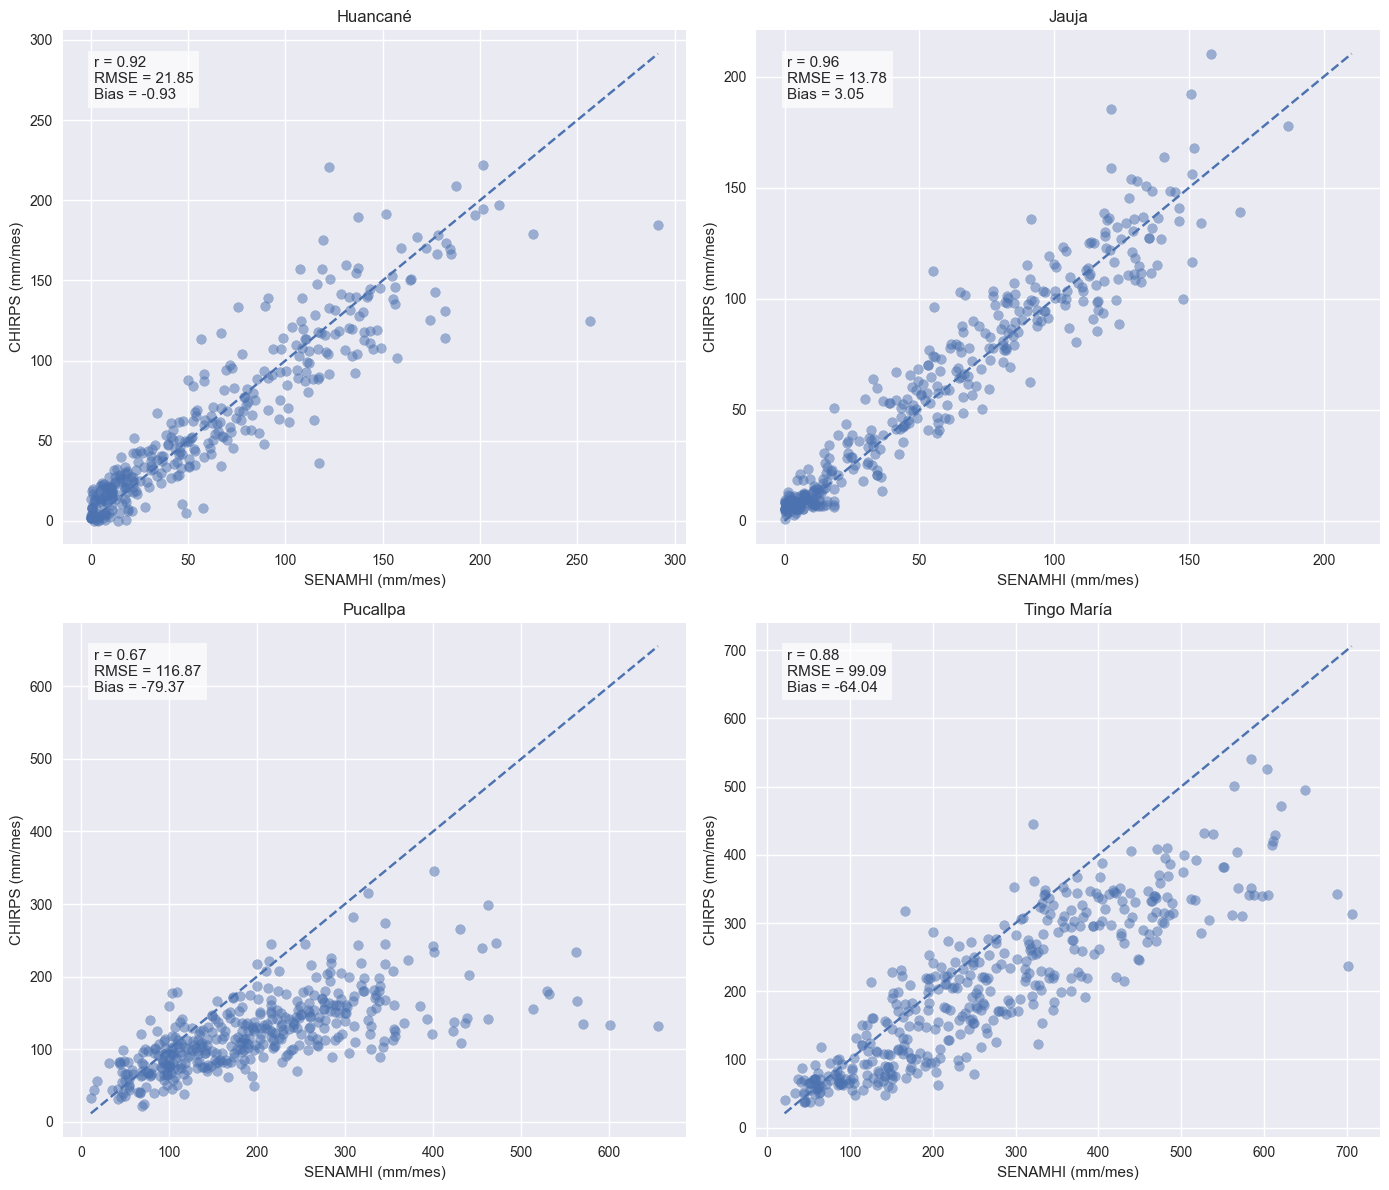

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# ============
# 1) Convertir CHIRPS a Series
# ============
tm_ch = pd.Series(tingomaria_precip.values, index=pd.to_datetime(tingomaria_precip.time.values)).resample("M").sum()
pu_ch = pd.Series(pucallpa_precip.values, index=pd.to_datetime(pucallpa_precip.time.values)).resample("M").sum()
hu_ch = pd.Series(huancane_precip.values, index=pd.to_datetime(huancane_precip.time.values)).resample("M").sum()
ja_ch = pd.Series(jauja_precip.values, index=pd.to_datetime(jauja_precip.time.values)).resample("M").sum()

# ============
# 2) Convertir SENAMHI a Series
# ============
df_total["Fecha"] = pd.to_datetime(df_total["Fecha"])

hu_se = df_total[df_total["Nombre"] == "HUANCANE"].set_index("Fecha")["Pp_completo"].resample("M").sum()
ja_se = df_total[df_total["Nombre"] == "JAUJA"].set_index("Fecha")["Pp_completo"].resample("M").sum()
pu_se = df_total[df_total["Nombre"] == "PUCALLPA"].set_index("Fecha")["Pp_completo"].resample("M").sum()
tm_se = df_total[df_total["Nombre"] == "TINGOMARIA"].set_index("Fecha")["Pp_completo"].resample("M").sum()

# ============
# 3) Emparejar y limpiar
# ============
def align(ch, se):
    df = pd.concat([ch, se], axis=1)
    df.columns = ["CHIRPS", "SENAMHI"]
    df = df.replace(0, np.nan).dropna()
    return df

hu = align(hu_ch, hu_se)
ja = align(ja_ch, ja_se)
pu = align(pu_ch, pu_se)
tm = align(tm_ch, tm_se)

# ============
# 4) Función para calcular métricas
# ============
def calcular_metricas(df):
    r = df.corr().iloc[0, 1]
    rmse = np.sqrt(mean_squared_error(df["SENAMHI"], df["CHIRPS"]))
    bias = df["CHIRPS"].mean() - df["SENAMHI"].mean()
    return r, rmse, bias

# ============
# 5) Gráfico 2x2
# ============
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

data = [
    ("Huancané", hu, axes[0,0]),
    ("Jauja", ja, axes[0,1]),
    ("Pucallpa", pu, axes[1,0]),
    ("Tingo María", tm, axes[1,1]),
]

for name, df, ax in data:
    r, rmse, bias = calcular_metricas(df)

    # scatter
    ax.scatter(df["SENAMHI"], df["CHIRPS"], alpha=0.5)

    # línea 1:1
    mins = min(df.min())
    maxs = max(df.max())
    ax.plot([mins, maxs], [mins, maxs], linestyle="--")

    # título limpio
    ax.set_title(name)

    # etiquetas
    ax.set_xlabel("SENAMHI (mm/mes)")
    ax.set_ylabel("CHIRPS (mm/mes)")
    ax.grid(True)

    # ============================
    # CAJA DE MÉTRICAS DENTRO DEL GRÁFICO
    # ============================
    texto = f"r = {r:.2f}\nRMSE = {rmse:.2f}\nBias = {bias:.2f}"

    ax.text(
        0.05, 0.95, texto,
        transform=ax.transAxes,
        fontsize=11,
        verticalalignment="top",
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none")
    )


plt.tight_layout()
plt.show()



In [44]:
def make_lagged_df(chirps, senamhi, freq="M", n_lags=12):
    # Resample
    if freq == "M":
        ch = chirps.resample("M").sum()
        se = senamhi.resample("M").sum()
    elif freq == "D":
        ch = chirps
        se = senamhi
    else:
        raise ValueError("freq must be 'M' or 'D'")
        
    df = pd.concat([ch, se], axis=1)
    df.columns = ["CHIRPS", "SENAMHI"]
    df = df.dropna()

    # lag features
    for i in range(1, n_lags+1):
        df[f"CHIRPS_lag{i}"] = df["CHIRPS"].shift(i)
        df[f"SENAMHI_lag{i}"] = df["SENAMHI"].shift(i)

    # month / day of year
    df["mes"] = df.index.month
    df["doy"] = df.index.dayofyear

    df = df.dropna()
    return df


In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

def entrenar_rf(df):
    X = df.drop(columns=["SENAMHI"])
    y = df["SENAMHI"]

    # 20% final como test
    train_size = int(len(df)*0.8)
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        random_state=42
    )
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    r = np.corrcoef(y_test, pred)[0,1]
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    bias = np.mean(pred - y_test)

    return model, X_test, y_test, pred, r, rmse, bias


In [46]:
stations = {
    "Huancane": (hu_ch, hu_se),
    "Jauja": (ja_ch, ja_se),
    "Pucallpa": (pu_ch, pu_se),
    "TingoMaria": (tm_ch, tm_se)
}

results = {}

for name, (ch, se) in stations.items():
    df = make_lagged_df(ch, se, freq="M", n_lags=12)
    model, Xtest, ytest, pred, r, rmse, bias = entrenar_rf(df)
    results[name] = {
        "model": model,
        "Xtest": Xtest,
        "ytest": ytest,
        "pred": pred,
        "r": r,
        "rmse": rmse,
        "bias": bias
    }


C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ch = chirps.resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  se = senamhi.resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ch = chirps.resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  se = senamhi.resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ch = chirps.resample

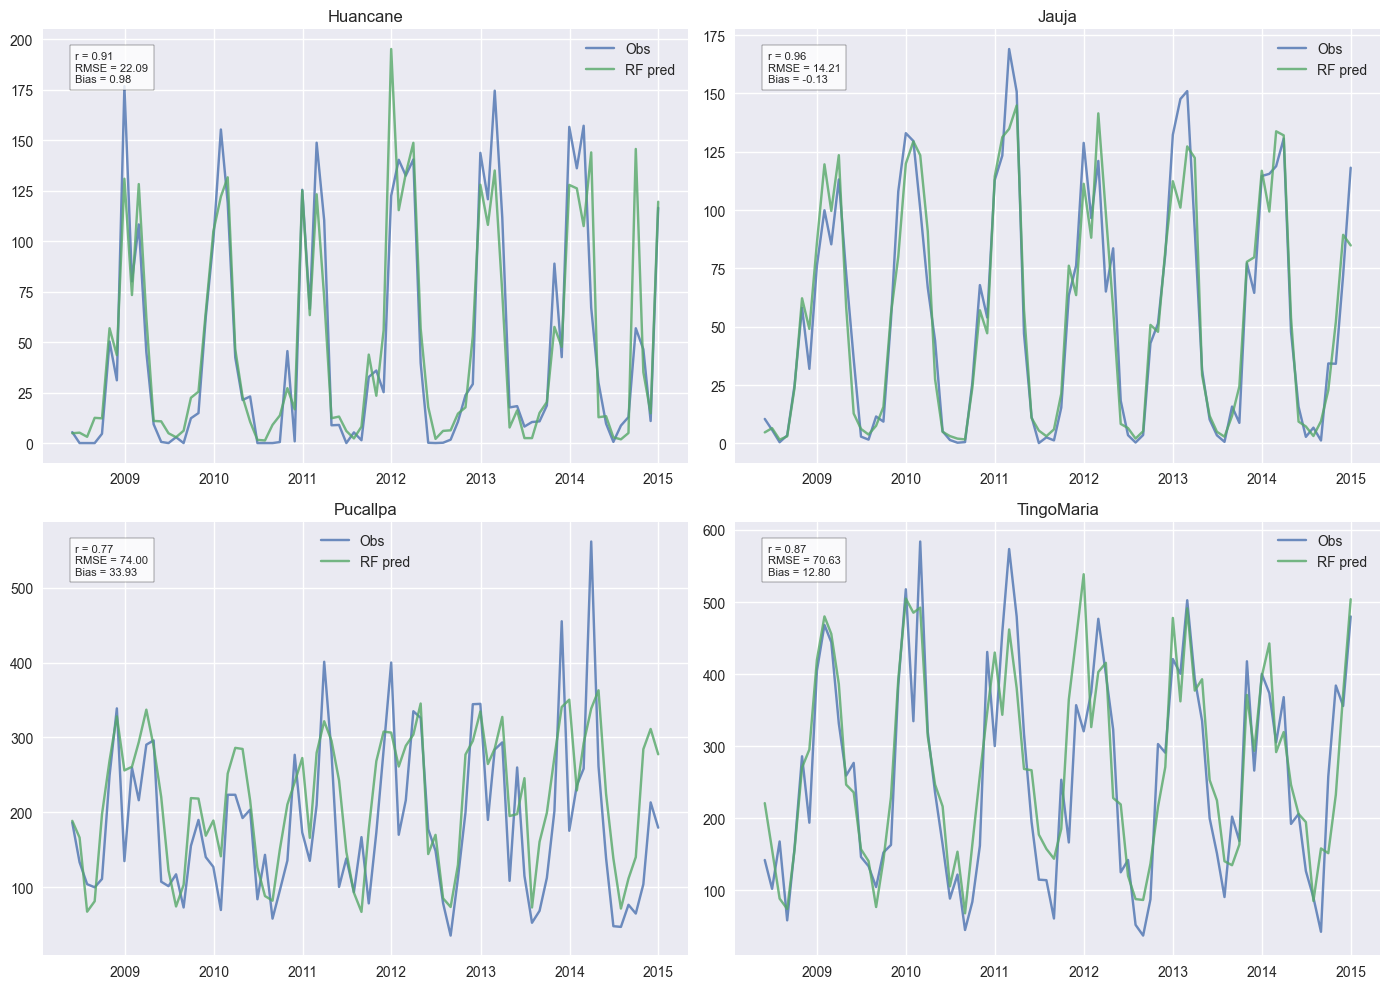

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for ax, (name, res) in zip(axes.flatten(), results.items()):
    y = res["ytest"]
    p = res["pred"]

    # Línea observada y predicha
    ax.plot(y.index, y, label="Obs", alpha=0.8)
    ax.plot(y.index, p, label="RF pred", alpha=0.8)

    ax.set_title(name)
    ax.grid(True)
    ax.legend()

    # ============================
    # CUADRO CON MÉTRICAS
    # ============================
    r     = res["r"]
    rmse  = res["rmse"]
    bias  = res["bias"]

    texto = f"r = {r:.2f}\nRMSE = {rmse:.2f}\nBias = {bias:.2f}"

    ax.text(
        0.05, 0.95, texto,
        transform=ax.transAxes,
        fontsize=8,
        verticalalignment="top",
        bbox=dict(
            facecolor="white",
            alpha=0.8,
            edgecolor="black"
        )
    )

plt.tight_layout()
plt.show()


In [48]:
def forecast_3_months(model, df_lagged):
    """
    model: RandomForestRegressor entrenado
    df_lagged: DataFrame lagged completo (make_lagged_df output)
    """

    # Se toma el último registro (con todos los lags actualizados)
    last = df_lagged.drop(columns=["SENAMHI"]).iloc[-1:].copy()

    preds = []

    for step in range(3):

        # A) predicción del siguiente mes
        pred = model.predict(last)[0]
        preds.append(pred)

        # B) actualizar los lags para la siguiente predicción
        # desplazar lags hacia atrás
        for i in range(12, 1, -1):  # 12 lags → lags 12→11→10→…
            last[f"CHIRPS_lag{i}"] = last[f"CHIRPS_lag{i-1}"]
            last[f"SENAMHI_lag{i}"] = last[f"SENAMHI_lag{i-1}"]

        # C) insertar nuestra predicción como lag1 de SENAMHI
        last["SENAMHI_lag1"] = pred

        # D) CHIRPS futuro NO ES CONOCIDO → se mantiene igual
        # (opción 2: puedes usar pronóstico CHIRPS o repetir último valor)

    return preds

In [49]:
forecast_resultados = {}

for name, res in results.items():
    df_lagged = make_lagged_df(stations[name][0], stations[name][1], freq="M", n_lags=12)
    preds = forecast_3_months(res["model"], df_lagged)
    forecast_resultados[name] = preds

forecast_resultados

C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ch = chirps.resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  se = senamhi.resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ch = chirps.resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  se = senamhi.resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\4148407346.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ch = chirps.resample

{'Huancane': [np.float64(119.4763495025998),
  np.float64(130.67183162944957),
  np.float64(129.91777377432143)],
 'Jauja': [np.float64(84.86332839995376),
  np.float64(87.04096983710323),
  np.float64(87.82971629401442)],
 'Pucallpa': [np.float64(277.4914592936271),
  np.float64(276.52826565463596),
  np.float64(284.62257806000264)],
 'TingoMaria': [np.float64(503.9115551210009),
  np.float64(495.1088434917073),
  np.float64(448.6293454607695)]}

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

def fit_and_visualize_rf(X, y):
    """
    Ajusta un Random Forest y visualiza predicho vs observado
    con métricas dentro del gráfico.

    Args:
        X : array-like (features)
        y : array-like (target)

    Returns:
        model, y_pred
    """

    # ------------------------
    # 1. Entrenar modelo
    # ------------------------
    model = RandomForestRegressor(
        n_estimators=500,
        max_depth=None,
        random_state=42
    )
    model.fit(X, y)

    # ------------------------
    # 2. Predicciones
    # ------------------------
    y_pred = model.predict(X)

    # ------------------------
    # 3. Métricas
    # ------------------------
    r = np.corrcoef(y, y_pred)[0, 1]
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    bias = np.mean(y_pred - y)

    # ------------------------
    # 4. Gráfico
    # ------------------------
    plt.figure(figsize=(7, 6))

    plt.scatter(y, y_pred, alpha=0.5, label="Datos")
    
    # línea diagonal automática
    lims = [
        min(min(y), min(y_pred)),
        max(max(y), max(y_pred))
    ]
    plt.plot(lims, lims, "r--", label="Línea ideal")

    plt.xlabel("Observado (mm)")
    plt.ylabel("Predicho (mm)")
    plt.title("Random Forest – Predicho vs Observado")
    plt.legend()
    plt.grid(alpha=0.3)

    # Caja con métricas
    texto = f"r = {r:.2f}\nRMSE = {rmse:.2f}\nBias = {bias:.2f}"
    plt.text(
        0.05, 0.95, texto,
        transform=plt.gca().transAxes,
        verticalalignment="top",
        bbox=dict(facecolor="white", alpha=0.7)
    )

    plt.show()

    return model, y_pred


In [51]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

df_ERA = pd.read_csv("C:/Users/mariosb/Desktop/TP2/ERA5/datos_huancane_exportados.csv")
df_ERA


valid_time  latitude  longitude        tp  number  expver
0      1981-01-01 06:00:00     -14.0     -70.00  0.016043       0       1
1      1981-01-01 06:00:00     -14.0     -69.75  0.020937       0       1
2      1981-01-01 06:00:00     -14.0     -69.50  0.016573       0       1
3      1981-01-01 06:00:00     -14.0     -69.25  0.015993       0       1
4      1981-01-01 06:00:00     -14.0     -69.00  0.013798       0       1
...                    ...       ...        ...       ...     ...     ...
18355  2014-12-01 06:00:00     -16.0     -70.00  0.005575       0       1
18356  2014-12-01 06:00:00     -16.0     -69.75  0.006124       0       1
18357  2014-12-01 06:00:00     -16.0     -69.50  0.007706       0       1
18358  2014-12-01 06:00:00     -16.0     -69.25  0.008947       0       1
18359  2014-12-01 06:00:00     -16.0     -69.00  0.007868       0       1

[18360 rows x 6 columns]

In [52]:
import pandas as pd

# --- Cargar CSV ---
huan = pd.read_csv("C:/Users/mariosb/Desktop/TP2/ERA5/datos_huancane_exportados.csv")
jauj = pd.read_csv("C:/Users/mariosb/Desktop/TP2/ERA5/datos_jauja_exportados.csv")
puca = pd.read_csv("C:/Users/mariosb/Desktop/TP2/ERA5/datos_pucallpa_exportados.csv")
ting = pd.read_csv("C:/Users/mariosb/Desktop/TP2/ERA5/datos_tingo_exportados.csv")

# --- Agregar nombre de estación ---
huan["estacion"] = "Huancané"
jauj["estacion"] = "Jauja"
puca["estacion"] = "Pucallpa"
ting["estacion"] = "Tingo María"

# --- Unir todo en un solo DataFrame ---
df_ERA5 = pd.concat([huan, jauj, puca, ting], ignore_index=True)

df_ERA5.head()


valid_time  latitude  longitude        tp  number  expver  \
0  1981-01-01 06:00:00     -14.0     -70.00  0.016043       0       1   
1  1981-01-01 06:00:00     -14.0     -69.75  0.020937       0       1   
2  1981-01-01 06:00:00     -14.0     -69.50  0.016573       0       1   
3  1981-01-01 06:00:00     -14.0     -69.25  0.015993       0       1   
4  1981-01-01 06:00:00     -14.0     -69.00  0.013798       0       1   

   estacion  
0  Huancané  
1  Huancané  
2  Huancané  
3  Huancané  
4  Huancané

In [53]:
# ============
# 1) Convertir CHIRPS a Series
# ============
tm_ch = pd.Series(tingomaria_precip.values, index=pd.to_datetime(tingomaria_precip.time.values)).resample("M").sum()
pu_ch = pd.Series(pucallpa_precip.values, index=pd.to_datetime(pucallpa_precip.time.values)).resample("M").sum()
hu_ch = pd.Series(huancane_precip.values, index=pd.to_datetime(huancane_precip.time.values)).resample("M").sum()
ja_ch = pd.Series(jauja_precip.values, index=pd.to_datetime(jauja_precip.time.values)).resample("M").sum()

# ============
# 2) Convertir SENAMHI a Series
# ============
df_total["Fecha"] = pd.to_datetime(df_total["Fecha"])

hu_se = df_total[df_total["Nombre"] == "HUANCANE"].set_index("Fecha")["Pp_completo"].resample("M").sum()
ja_se = df_total[df_total["Nombre"] == "JAUJA"].set_index("Fecha")["Pp_completo"].resample("M").sum()
pu_se = df_total[df_total["Nombre"] == "PUCALLPA"].set_index("Fecha")["Pp_completo"].resample("M").sum()
tm_se = df_total[df_total["Nombre"] == "TINGOMARIA"].set_index("Fecha")["Pp_completo"].resample("M").sum()

# ============
# 3) Convertir ERA5 a Series
# ============
df_ERA5["valid_time"] = pd.to_datetime(df_ERA5["valid_time"])
df_ERA5["tp_mm"] = df_ERA5["tp"] * 1000
era_diario = df_ERA5.groupby(["estacion", "valid_time"])["tp_mm"].sum().reset_index()

# Resample mensual
era_mensual = (era_diario.set_index("valid_time").groupby("estacion")["tp_mm"].resample("M").sum().reset_index())

hu_er = era_mensual[era_mensual["estacion"]=="Huancané"].set_index("valid_time")["tp_mm"]
ja_er = era_mensual[era_mensual["estacion"]=="Jauja"].set_index("valid_time")["tp_mm"]
pu_er = era_mensual[era_mensual["estacion"]=="Pucallpa"].set_index("valid_time")["tp_mm"]
tm_er = era_mensual[era_mensual["estacion"]=="Tingo María"].set_index("valid_time")["tp_mm"]

C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\3671290790.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  tm_ch = pd.Series(tingomaria_precip.values, index=pd.to_datetime(tingomaria_precip.time.values)).resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\3671290790.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pu_ch = pd.Series(pucallpa_precip.values, index=pd.to_datetime(pucallpa_precip.time.values)).resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\3671290790.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  hu_ch = pd.Series(huancane_precip.values, index=pd.to_datetime(huancane_precip.time.values)).resample("M").sum()
C:\Users\mariosb\AppData\Local\Temp\ipykernel_18564\3671290790.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, plea

In [54]:
tm_ch.to_csv(r"C:\Users\mariosb\neuron\tingomaria_chirps_mensual.csv")
pu_ch.to_csv(r"C:\Users\mariosb\neuron\pucallpa_chirps_mensual.csv")
hu_ch.to_csv(r"C:\Users\mariosb\neuron\huancane_chirps_mensual.csv")
ja_ch.to_csv(r"C:\Users\mariosb\neuron\jauja_chirps_mensual.csv")

In [55]:
# --- HUANCANÉ ---
hu = pd.concat([hu_ch, hu_se, hu_er], axis=1)
hu.columns = ["CHIRPS", "SENAMHI", "ERA5"]
hu = hu.replace(0, np.nan).dropna()

# --- JAUJA ---
ja = pd.concat([ja_ch, ja_se, ja_er], axis=1)
ja.columns = ["CHIRPS", "SENAMHI", "ERA5"]
ja = ja.replace(0, np.nan).dropna()

# --- PUCALLPA ---
pu = pd.concat([pu_ch, pu_se, pu_er], axis=1)
pu.columns = ["CHIRPS", "SENAMHI", "ERA5"]
pu = pu.replace(0, np.nan).dropna()

# --- TINGO MARÍA ---
tm = pd.concat([tm_ch, tm_se, tm_er], axis=1)
tm.columns = ["CHIRPS", "SENAMHI", "ERA5"]
tm = tm.replace(0, np.nan).dropna()

In [56]:
hu

CHIRPS     SENAMHI        ERA5
1981-01-31  184.307816  291.426178  478.170396
1981-02-28  119.825188  108.973625  410.745624
1981-03-31  128.611053  115.022913  375.890732
1981-04-30   50.451740   69.963570  179.779053
1981-05-31   11.952219    7.888258  112.297058
...                ...         ...         ...
2014-05-31   16.489346    9.646344  157.224655
2014-09-30  113.605858   56.836215  190.919876
2014-10-31   33.257286   46.462266  164.453506
2014-11-30   18.138660   10.918287  237.562180
2014-12-31  117.786224  116.478420  376.770020

[344 rows x 3 columns]

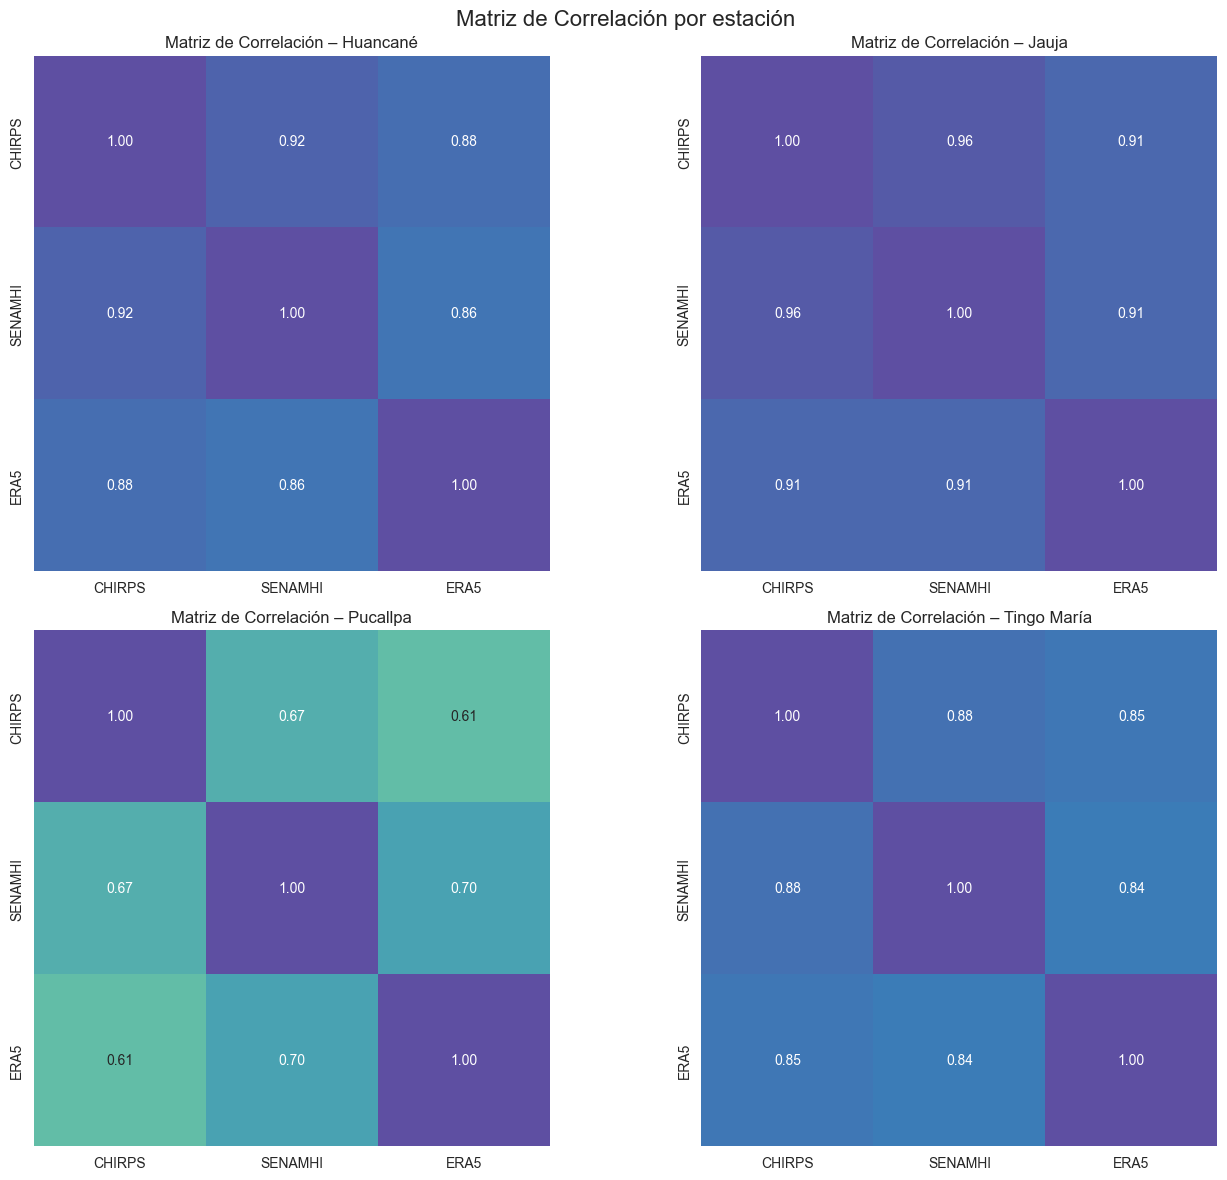

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Crear figura 2x2 ---
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Lista de datasets
datasets = [
    ("Huancané", hu, axes[0, 0]),
    ("Jauja", ja, axes[0, 1]),
    ("Pucallpa", pu, axes[1, 0]),
    ("Tingo María", tm, axes[1, 1])
]

# --- Dibujar cada heatmap ---
for name, df, ax in datasets:
    
    # matriz de correlación
    corr = df.corr()

    # heatmap bonito con seaborn
    sns.heatmap(
        corr,
        annot=True,
        fmt=".2f",
        cmap="Spectral",
        vmin=-1,
        vmax=1,
        square=True,
        ax=ax,
        cbar=False   # para evitar 4 barras repetidas (queda más limpio)
    )

    ax.set_title(f"Matriz de Correlación – {name}", fontsize=12)

# Ajuste final
plt.suptitle("Matriz de Correlación por estación", 
             fontsize=16)
plt.tight_layout()
plt.show()



In [58]:
hu

CHIRPS     SENAMHI        ERA5
1981-01-31  184.307816  291.426178  478.170396
1981-02-28  119.825188  108.973625  410.745624
1981-03-31  128.611053  115.022913  375.890732
1981-04-30   50.451740   69.963570  179.779053
1981-05-31   11.952219    7.888258  112.297058
...                ...         ...         ...
2014-05-31   16.489346    9.646344  157.224655
2014-09-30  113.605858   56.836215  190.919876
2014-10-31   33.257286   46.462266  164.453506
2014-11-30   18.138660   10.918287  237.562180
2014-12-31  117.786224  116.478420  376.770020

[344 rows x 3 columns]

Tamaño del DataFrame final (filas x cols): (344, 3)
                CHIRPS     SENAMHI        ERA5
1981-01-31  184.307816  291.426178  478.170396
1981-02-28  119.825188  108.973625  410.745624
1981-03-31  128.611053  115.022913  375.890732
1981-04-30   50.451740   69.963570  179.779053
1981-05-31   11.952219    7.888258  112.297058

Datos: total=344, train=332, test=12

Regresión lineal - coeficientes:
  CHIRPS: 0.8162
  ERA5: 0.0952
Intercept: -10.8098

Importancia de variables (RF):
CHIRPS    0.910453
ERA5      0.089547
dtype: float64

Métricas en conjunto TEST:
  Regresión lineal -> RMSE: 26.803 , R²: 0.728
  Random Forest    -> RMSE: 34.237 , R²: 0.556


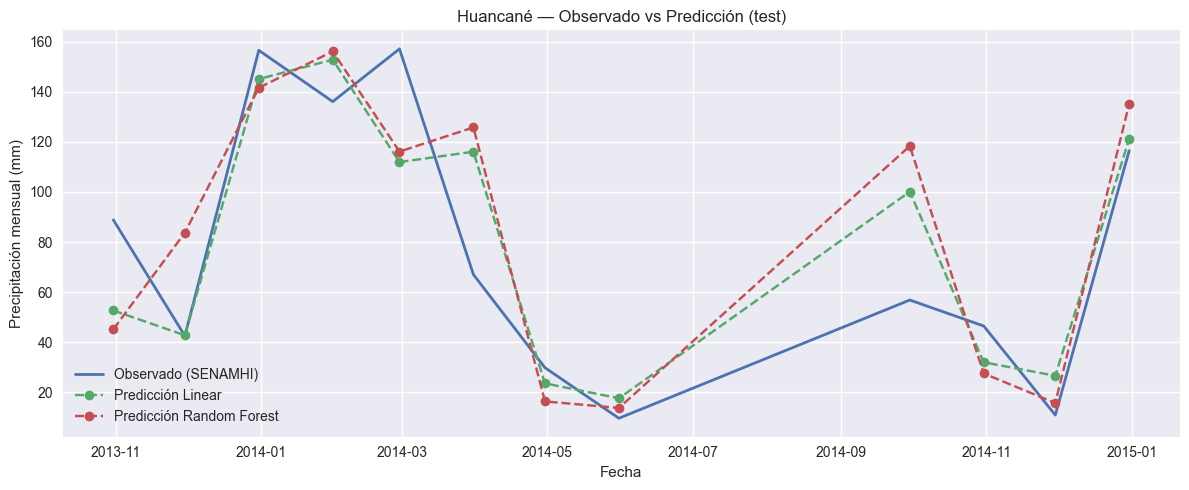


Primeras filas de 'results':
            SENAMHI_obs    pred_lin     pred_rf
2013-10-31    88.838262   52.662752   45.157871
2013-11-30    42.538959   42.771185   83.702374
2013-12-31   156.527772  145.051954  141.577176
2014-01-31   136.041329  152.771055  156.053788
2014-02-28   157.093774  111.901123  116.100283


In [59]:
# Código completo para Huancané (usa hu_ch, hu_se, hu_er ya creadas)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

# -----------------------
# 0) Parámetros
# -----------------------
RANDOM_STATE = 42
N_ESTIMATORS = 500

# -----------------------
# 1) Crear DataFrame mensual unificado (Huancané)
# -----------------------
# Las series deben ser pandas.Series indexadas por fecha (resample("M").sum() ya hecho)
# hu_ch, hu_se, hu_er --> vienen de tu bloque anterior
df = pd.concat([hu_ch, hu_se, hu_er], axis=1)

# Asegurar nombres de columnas
df.columns = ["CHIRPS", "SENAMHI", "ERA5"]

# Reemplazar ceros por NaN y eliminar filas con NaN
df = df.replace(0, np.nan)
df = df.dropna(how="any")  # filas donde falte cualquiera de las 3 se eliminan

# Asegurar orden temporal
df = df.sort_index()

print("Tamaño del DataFrame final (filas x cols):", df.shape)
print(df.head())

# -----------------------
# 2) Preparar X y y
# -----------------------
X = df[["CHIRPS", "ERA5"]].astype(float)
y = df["SENAMHI"].astype(float)

# -----------------------
# 3) División temporal (si hay suficientes datos, usar último año como test)
# -----------------------
n = len(df)
if n >= 36:
    # si hay >=3 años, usar último año como test
    test_months = 12
    train_size = n - test_months
else:
    # si pocos datos, usar 15% final como test (mínimo 6 meses si es posible)
    test_size = max(int(0.15 * n), 6)
    train_size = n - test_size

X_train, X_test = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

print(f"\nDatos: total={n}, train={len(X_train)}, test={len(X_test)}")

# -----------------------
# 4) Entrenar Regresión Lineal
# -----------------------
lin = LinearRegression()
lin.fit(X_train, y_train)
pred_lin = lin.predict(X_test)

# Coeficientes
print("\nRegresión lineal - coeficientes:")
for name, coef in zip(X.columns, lin.coef_):
    print(f"  {name}: {coef:.4f}")
print(f"Intercept: {lin.intercept_:.4f}")

# -----------------------
# 5) Entrenar Random Forest
# -----------------------
rf = RandomForestRegressor(
    n_estimators=N_ESTIMATORS,
    random_state=RANDOM_STATE,
    n_jobs=-1
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

# Importancias
importancias = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nImportancia de variables (RF):")
print(importancias)

# -----------------------
# 6) Métricas
# -----------------------
def metrics(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return rmse, r2

rmse_lin, r2_lin = metrics(y_test, pred_lin)
rmse_rf, r2_rf = metrics(y_test, pred_rf)

print("\nMétricas en conjunto TEST:")
print(f"  Regresión lineal -> RMSE: {rmse_lin:.3f} , R²: {r2_lin:.3f}")
print(f"  Random Forest    -> RMSE: {rmse_rf:.3f} , R²: {r2_rf:.3f}")

# -----------------------
# 7) Gráfica comparativa (observado vs predicciones)
# -----------------------
plt.figure(figsize=(12,5))
plt.plot(y_test.index, y_test.values, label="Observado (SENAMHI)", linewidth=2)
plt.plot(y_test.index, pred_lin, label="Predicción Linear", linestyle="--", marker='o')
plt.plot(y_test.index, pred_rf, label="Predicción Random Forest", linestyle="--", marker='o')
plt.title("Huancané — Observado vs Predicción (test)")
plt.ylabel("Precipitación mensual (mm)")
plt.xlabel("Fecha")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -----------------------
# 8) Salvar resultados (opcional)
# -----------------------
results = pd.DataFrame({
    "SENAMHI_obs": y_test,
    "pred_lin": pred_lin,
    "pred_rf": pred_rf
}, index=y_test.index)

# Guarda si quieres
# results.to_csv("huancane_preds.csv", index=True)
print("\nPrimeras filas de 'results':")
print(results.head())


In [60]:
results

SENAMHI_obs    pred_lin     pred_rf
2013-10-31    88.838262   52.662752   45.157871
2013-11-30    42.538959   42.771185   83.702374
2013-12-31   156.527772  145.051954  141.577176
2014-01-31   136.041329  152.771055  156.053788
2014-02-28   157.093774  111.901123  116.100283
2014-03-31    67.002580  116.054069  125.744170
2014-04-30    29.836595   23.576005   16.369974
2014-05-31     9.646344   17.618073   13.758454
2014-09-30    56.836215  100.094739  118.307043
2014-10-31    46.462266   31.992674   27.512278
2014-11-30    10.918287   26.612973   15.737780
2014-12-31   116.478420  121.201075  135.174405

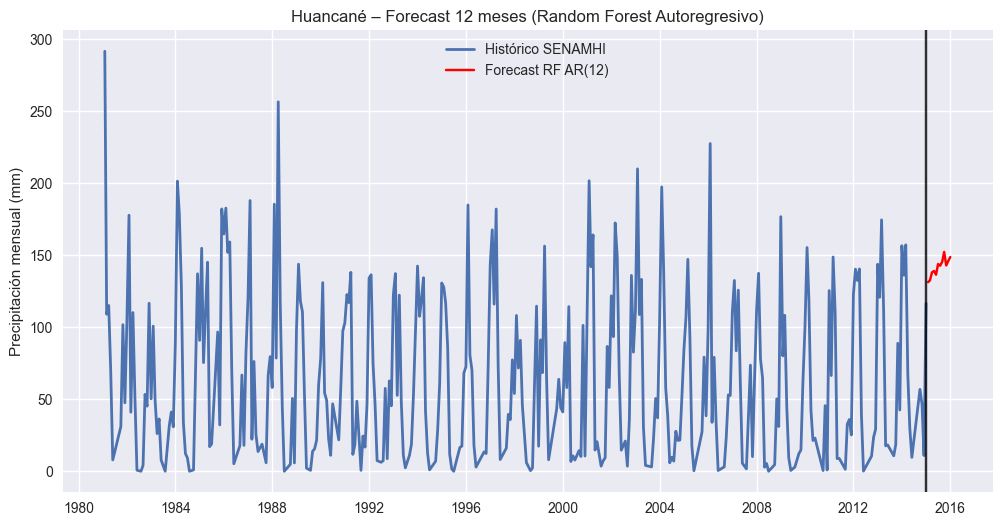

FORECAST (mm):
2015-01-31    131.205765
2015-02-28    132.523743
2015-03-31    138.057898
2015-04-30    139.016053
2015-05-31    136.387878
2015-06-30    143.807368
2015-07-31    142.612358
2015-08-31    145.278223
2015-09-30    152.203630
2015-10-31    142.832788
2015-11-30    145.794840
2015-12-31    148.609150
dtype: float64


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# -------------------------------------------------------
# 1) Dataset original
# -------------------------------------------------------
df = pd.concat([hu_ch, hu_se, hu_er], axis=1)
df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
df = df.replace(0, np.nan).dropna()
df = df.sort_index()

# -------------------------------------------------------
# 2) Crear rezagos (lags)
# -------------------------------------------------------
max_lag = 12  # 12 meses

for lag in range(1, max_lag + 1):
    df[f"SENAMHI_lag{lag}"] = df["SENAMHI"].shift(lag)
    df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
    df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)

df_lag = df.dropna()

# Variables predictoras = todos los lags
X = df_lag.drop(columns=["SENAMHI"])
y = df_lag["SENAMHI"]

# -------------------------------------------------------
# 3) Split temporal
# -------------------------------------------------------
train_size = len(df_lag) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# -------------------------------------------------------
# 4) Modelo Random Forest
# -------------------------------------------------------
rf = RandomForestRegressor(n_estimators=600, random_state=42)
rf.fit(X_train, y_train)

# -------------------------------------------------------
# 5) Forecast autoregresivo 12 meses
# -------------------------------------------------------
forecast_horizon = 12
preds = []
last_row = df_lag.iloc[-1].copy()

for i in range(1, forecast_horizon + 1):

    # Crear nuevo registro con los últimos lags actualizados
    new_x = last_row.drop(labels=["SENAMHI"]).copy().values.reshape(1, -1)

    pred = rf.predict(new_x)[0]
    preds.append(pred)

    # Shift manual de SENAMHI_lag
    for lag in range(max_lag, 1, -1):
        last_row[f"SENAMHI_lag{lag}"] = last_row[f"SENAMHI_lag{lag-1}"]
    last_row["SENAMHI_lag1"] = pred

    # Igualmente con CHIRPS y ERA5 (persistencia suave)
    for lag in range(max_lag, 1, -1):
        last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
        last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]

forecast_index = [df_lag.index[-1] + pd.DateOffset(months=i) for i in range(1, forecast_horizon + 1)]
forecast_series = pd.Series(preds, index=forecast_index)

# -------------------------------------------------------
# 6) Gráfico completo
# -------------------------------------------------------
plt.figure(figsize=(12,6))
plt.plot(df.index, df["SENAMHI"], label="Histórico SENAMHI", linewidth=2)
plt.plot(forecast_series.index, forecast_series.values, label="Forecast RF AR(12)", color="red")
plt.axvline(df.index[-1], color="k", linestyle="-", alpha=0.8)
plt.ylabel("Precipitación mensual (mm)")
plt.title("Huancané – Forecast 12 meses (Random Forest Autoregresivo)")
plt.grid(True)
plt.legend()
plt.show()

print("FORECAST (mm):")
print(forecast_series)



=== Estación: Huancané ===


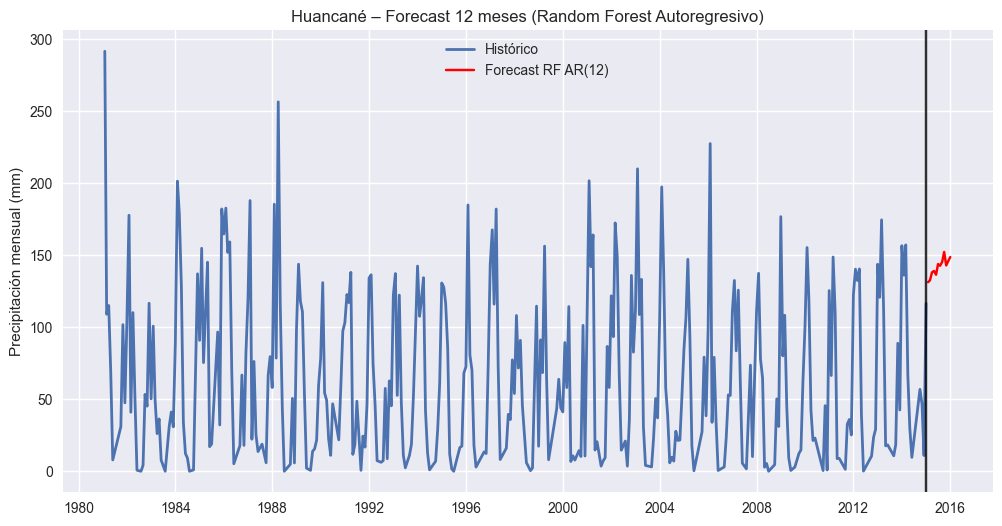


=== Estación: Jauja ===


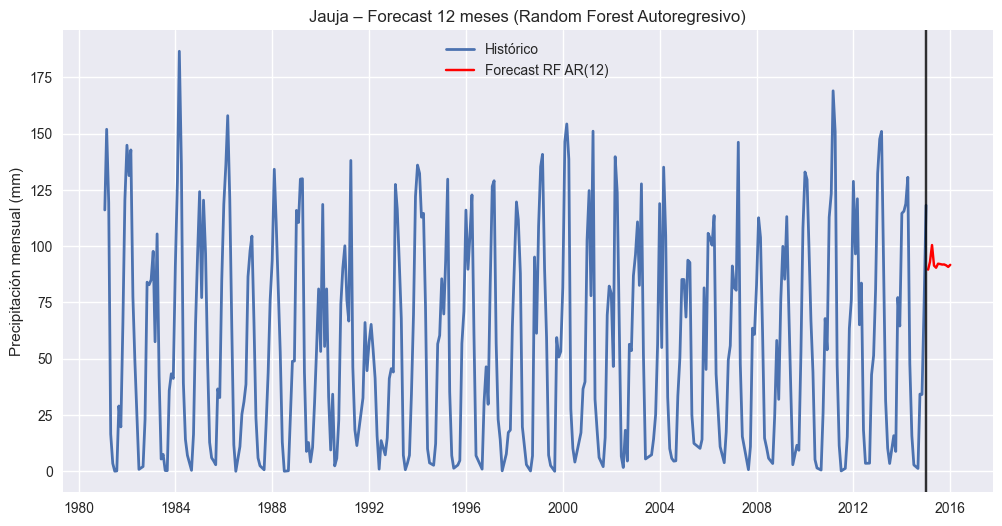


=== Estación: Pucallpa ===


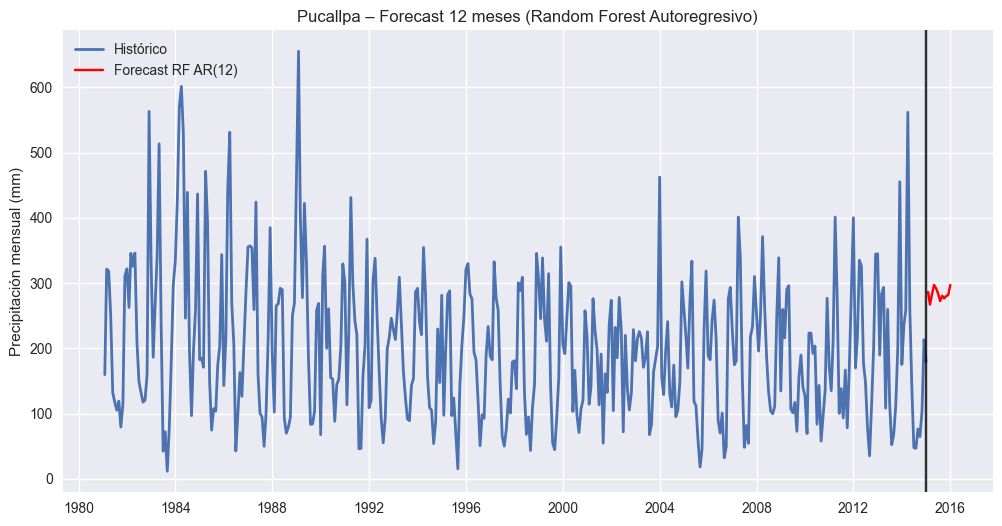


=== Estación: Tingo María ===


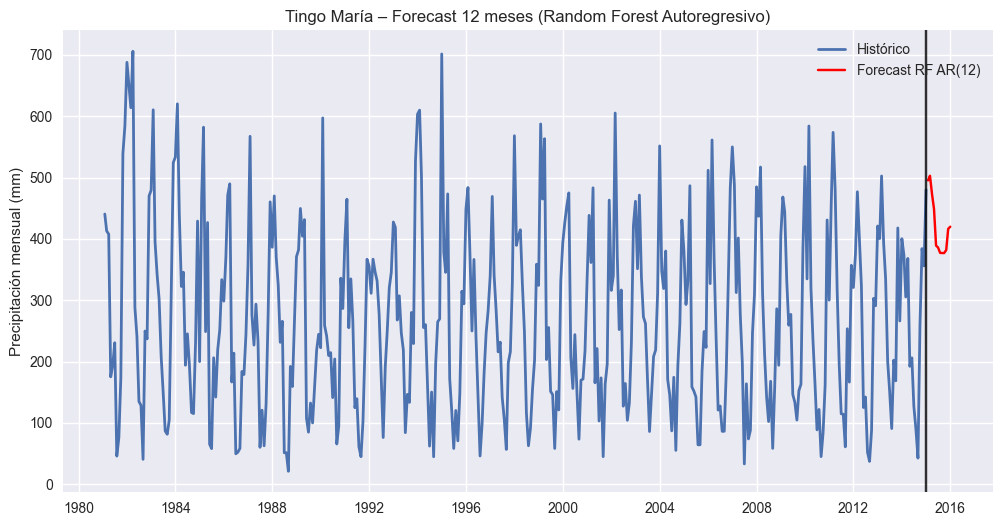

FORECAST de las 4 estaciones (12 meses):
              Huancané       Jauja    Pucallpa  Tingo María
2015-01-31  131.205765   89.594773  286.260176   495.369375
2015-02-28  132.523743   93.035272  267.104831   502.836119
2015-03-31  138.057898  100.513415  282.655307   472.880507
2015-04-30  139.016053   91.388446  297.228618   448.800990
2015-05-31  136.387878   90.436114  292.011846   389.008158
2015-06-30  143.807368   92.223244  284.140636   385.860959
2015-07-31  142.612358   92.072464  272.468305   377.154624
2015-08-31  145.278223   91.852084  280.468071   376.859900
2015-09-30  152.203630   91.889457  276.563459   376.872586
2015-10-31  142.832788   91.477511  280.002106   381.757821
2015-11-30  145.794840   90.809506  281.774535   416.331104
2015-12-31  148.609150   91.711322  296.975427   419.784268


In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# ---------------------------------------------------
# Diccionario con tus series por estación
# ---------------------------------------------------
estaciones = {
    "Huancané": {"CHIRPS": hu_ch, "SENAMHI": hu_se, "ERA5": hu_er},
    "Jauja":    {"CHIRPS": ja_ch, "SENAMHI": ja_se, "ERA5": ja_er},
    "Pucallpa": {"CHIRPS": pu_ch, "SENAMHI": pu_se, "ERA5": pu_er},
    "Tingo María": {"CHIRPS": tm_ch, "SENAMHI": tm_se, "ERA5": tm_er},
}

max_lag = 12          # número de rezagos
forecast_horizon = 12 # meses a predecir

# Diccionario para guardar forecast de cada estación
forecast_all = {}

# ---------------------------------------------------
# Loop por cada estación
# ---------------------------------------------------
for est, data in estaciones.items():
    print(f"\n=== Estación: {est} ===")
    
    # 1) Crear DataFrame
    df = pd.concat([data["CHIRPS"], data["SENAMHI"], data["ERA5"]], axis=1)
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
    df = df.replace(0, np.nan).dropna()
    df = df.sort_index()
    
    # 2) Crear lags
    for lag in range(1, max_lag + 1):
        df[f"SENAMHI_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)
    
    df_lag = df.dropna()
    
    # 3) Variables predictoras y target
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]
    
    # 4) Train-test (últimos 12 meses para test)
    train_size = len(df_lag) - 12
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    
    # 5) Entrenar Random Forest
    rf = RandomForestRegressor(n_estimators=600, random_state=42)
    rf.fit(X_train, y_train)
    
    # 6) Forecast autoregresivo 12 meses
    last_row = df_lag.iloc[-1].copy()
    preds = []
    
    for i in range(1, forecast_horizon + 1):
        new_x = last_row.drop(labels=["SENAMHI"]).copy().values.reshape(1, -1)
        pred = rf.predict(new_x)[0]
        preds.append(pred)
        
        # Shift manual de SENAMHI_lag
        for lag in range(max_lag, 1, -1):
            last_row[f"SENAMHI_lag{lag}"] = last_row[f"SENAMHI_lag{lag-1}"]
        last_row["SENAMHI_lag1"] = pred
        
        # Shift de CHIRPS y ERA5 (persistencia)
        for lag in range(max_lag, 1, -1):
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]
    
    forecast_index = [df_lag.index[-1] + pd.DateOffset(months=i) for i in range(1, forecast_horizon + 1)]
    forecast_series = pd.Series(preds, index=forecast_index, name=f"{est}_Forecast")
    
    forecast_all[est] = forecast_series
    
    # 7) Gráfico
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df["SENAMHI"], label="Histórico", linewidth=2)
    plt.plot(forecast_series.index, forecast_series.values, label="Forecast RF AR(12)", color="red")
    plt.axvline(df.index[-1], color="k", linestyle="-", alpha=0.8)
    plt.ylabel("Precipitación mensual (mm)")
    plt.title(f"{est} – Forecast 12 meses (Random Forest Autoregresivo)")
    plt.grid(True)
    plt.legend()
    plt.show()

# ---------------------------------------------------
# 8) Todos los forecast juntos
# ---------------------------------------------------
df_forecast = pd.DataFrame(forecast_all)
print("FORECAST de las 4 estaciones (12 meses):")
print(df_forecast)



=== Estación: Huancané ===
RMSE test = 38.74
MAE  test = 28.37
R²   test = 0.432


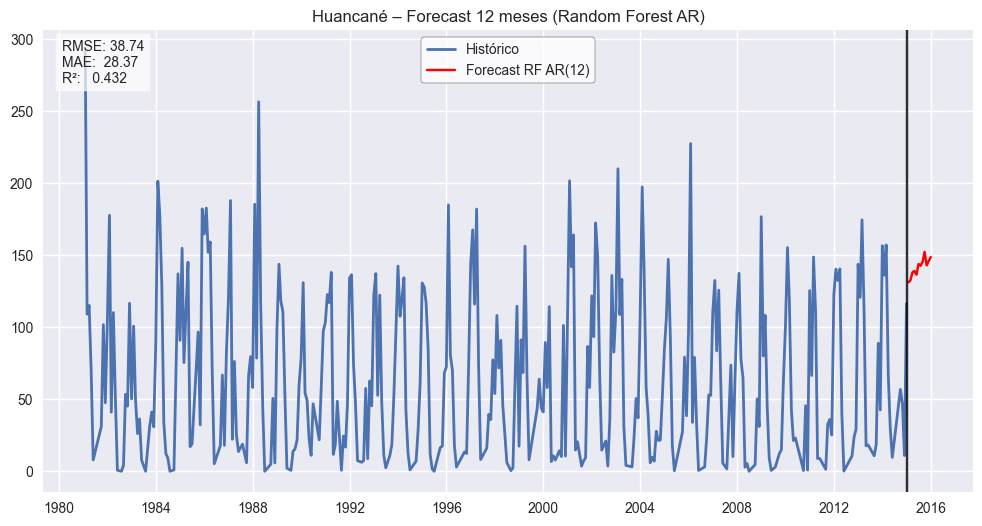


=== Estación: Jauja ===
RMSE test = 14.40
MAE  test = 11.64
R²   test = 0.910


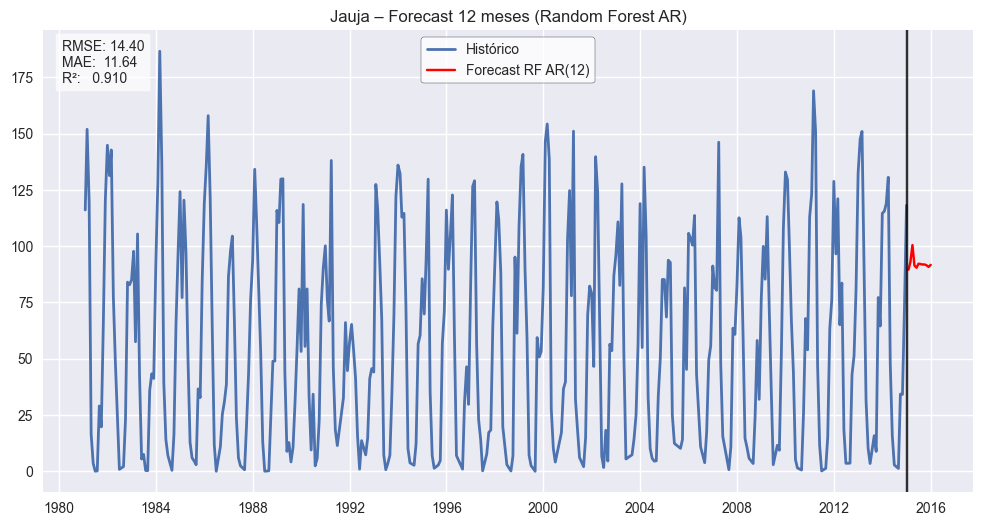


=== Estación: Pucallpa ===
RMSE test = 102.04
MAE  test = 81.38
R²   test = 0.456


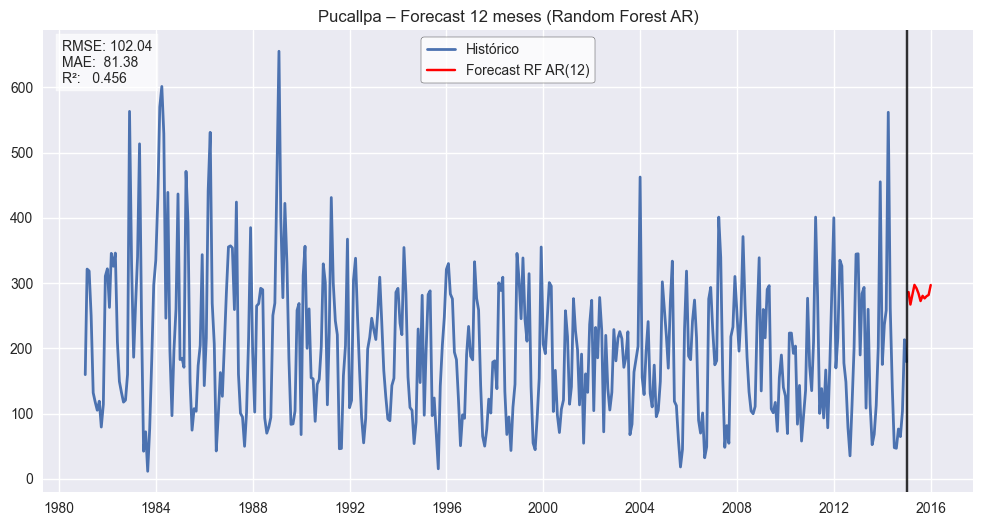


=== Estación: Tingo María ===
RMSE test = 68.71
MAE  test = 50.15
R²   test = 0.718


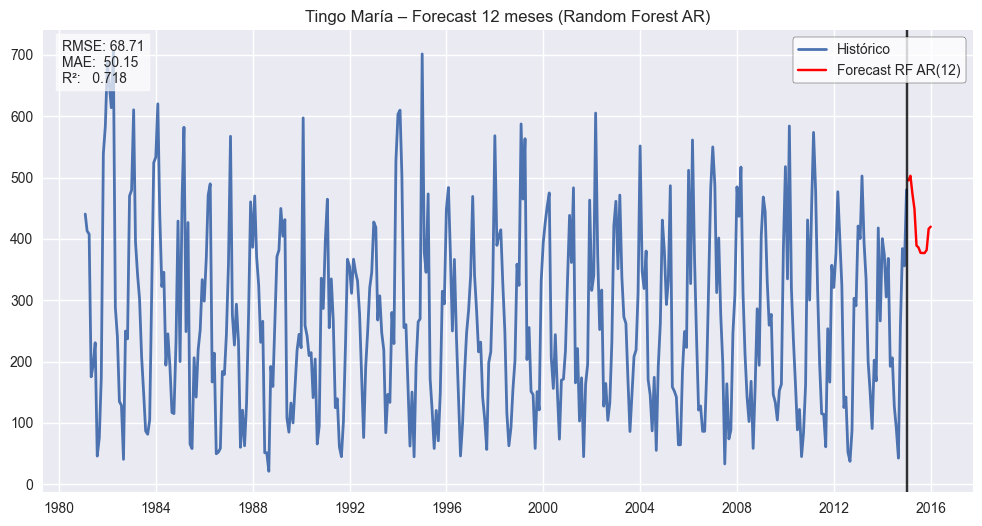


FORECAST de las 4 estaciones:
              Huancané       Jauja    Pucallpa  Tingo María
2015-01-31  131.205765   89.594773  286.260176   495.369375
2015-02-28  132.523743   93.035272  267.104831   502.836119
2015-03-31  138.057898  100.513415  282.655307   472.880507
2015-04-30  139.016053   91.388446  297.228618   448.800990
2015-05-31  136.387878   90.436114  292.011846   389.008158
2015-06-30  143.807368   92.223244  284.140636   385.860959
2015-07-31  142.612358   92.072464  272.468305   377.154624
2015-08-31  145.278223   91.852084  280.468071   376.859900
2015-09-30  152.203630   91.889457  276.563459   376.872586
2015-10-31  142.832788   91.477511  280.002106   381.757821
2015-11-30  145.794840   90.809506  281.774535   416.331104
2015-12-31  148.609150   91.711322  296.975427   419.784268


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ---------------------------------------------------
# Diccionario con tus series por estación
# ---------------------------------------------------
estaciones = {
    "Huancané": {"CHIRPS": hu_ch, "SENAMHI": hu_se, "ERA5": hu_er},
    "Jauja":    {"CHIRPS": ja_ch, "SENAMHI": ja_se, "ERA5": ja_er},
    "Pucallpa": {"CHIRPS": pu_ch, "SENAMHI": pu_se, "ERA5": pu_er},
    "Tingo María": {"CHIRPS": tm_ch, "SENAMHI": tm_se, "ERA5": tm_er},
}

max_lag = 12
forecast_horizon = 12

forecast_all = {}

# ---------------------------------------------------
# Loop por estación
# ---------------------------------------------------
for est, data in estaciones.items():
    print(f"\n=== Estación: {est} ===")
    
    df = pd.concat([data["CHIRPS"], data["SENAMHI"], data["ERA5"]], axis=1)
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
    df = df.replace(0, np.nan).dropna().sort_index()
    
    # Crear lags
    for lag in range(1, max_lag + 1):
        df[f"SENAMHI_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)
    
    df_lag = df.dropna()
    
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]
    
    train_size = len(df_lag) - 12
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    
    # Entrenar
    rf = RandomForestRegressor(n_estimators=600, random_state=42)
    rf.fit(X_train, y_train)
    
    # ==============================
    #  MÉTRICAS DE EVALUACIÓN
    # ==============================
    y_pred_test = rf.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))  # RMSE manual
    mae  = mean_absolute_error(y_test, y_pred_test)
    r2   = r2_score(y_test, y_pred_test)

    
    print(f"RMSE test = {rmse:.2f}")
    print(f"MAE  test = {mae:.2f}")
    print(f"R²   test = {r2:.3f}")
    
    # ==============================
    # FORECAST AUTORREGRESIVO
    # ==============================
    last_row = df_lag.iloc[-1].copy()
    preds = []
    
    for i in range(1, forecast_horizon + 1):
        new_x = last_row.drop(labels=["SENAMHI"]).copy().values.reshape(1, -1)
        pred = rf.predict(new_x)[0]
        preds.append(pred)
        
        # Actualizar lags SENAMHI
        for lag in range(max_lag, 1, -1):
            last_row[f"SENAMHI_lag{lag}"] = last_row[f"SENAMHI_lag{lag-1}"]
        last_row["SENAMHI_lag1"] = pred
        
        # Persistencia CHIRPS/ERA5
        for lag in range(max_lag, 1, -1):
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]
    
    forecast_index = [df_lag.index[-1] + pd.DateOffset(months=i)
                      for i in range(1, forecast_horizon + 1)]
    forecast_series = pd.Series(preds, index=forecast_index, name=f"{est}_Forecast")
    
    forecast_all[est] = forecast_series
    
    # ==============================
    # Gráfico
    # ==============================
    plt.figure(figsize=(12,6))
    plt.plot(df.index, df["SENAMHI"], label="Histórico", linewidth=2)
    plt.plot(forecast_series.index, forecast_series, label="Forecast RF AR(12)", color="red")
    plt.axvline(df.index[-1], color="k", linestyle="-", alpha=0.8)
    
    # Insertar métricas en la esquina superior izquierda
    texto = (f"RMSE: {rmse:.2f}\n"
             f"MAE:  {mae:.2f}\n"
             f"R²:   {r2:.3f}")
    plt.text(0.02, 0.98, texto,
             transform=plt.gca().transAxes,
             fontsize=10,
             va="top",
             bbox=dict(facecolor="white", alpha=0.7))
    
    plt.title(f"{est} – Forecast 12 meses (Random Forest AR)")
    plt.grid(True)
    plt.legend()
    plt.legend(frameon=True, facecolor="white", framealpha=0.8, edgecolor="black")
    plt.show()

# Forecasts combinados
df_forecast = pd.DataFrame(forecast_all)
print("\nFORECAST de las 4 estaciones:")
print(df_forecast)



=== Estación: Huancané ===

=== Estación: Jauja ===

=== Estación: Pucallpa ===

=== Estación: Tingo María ===


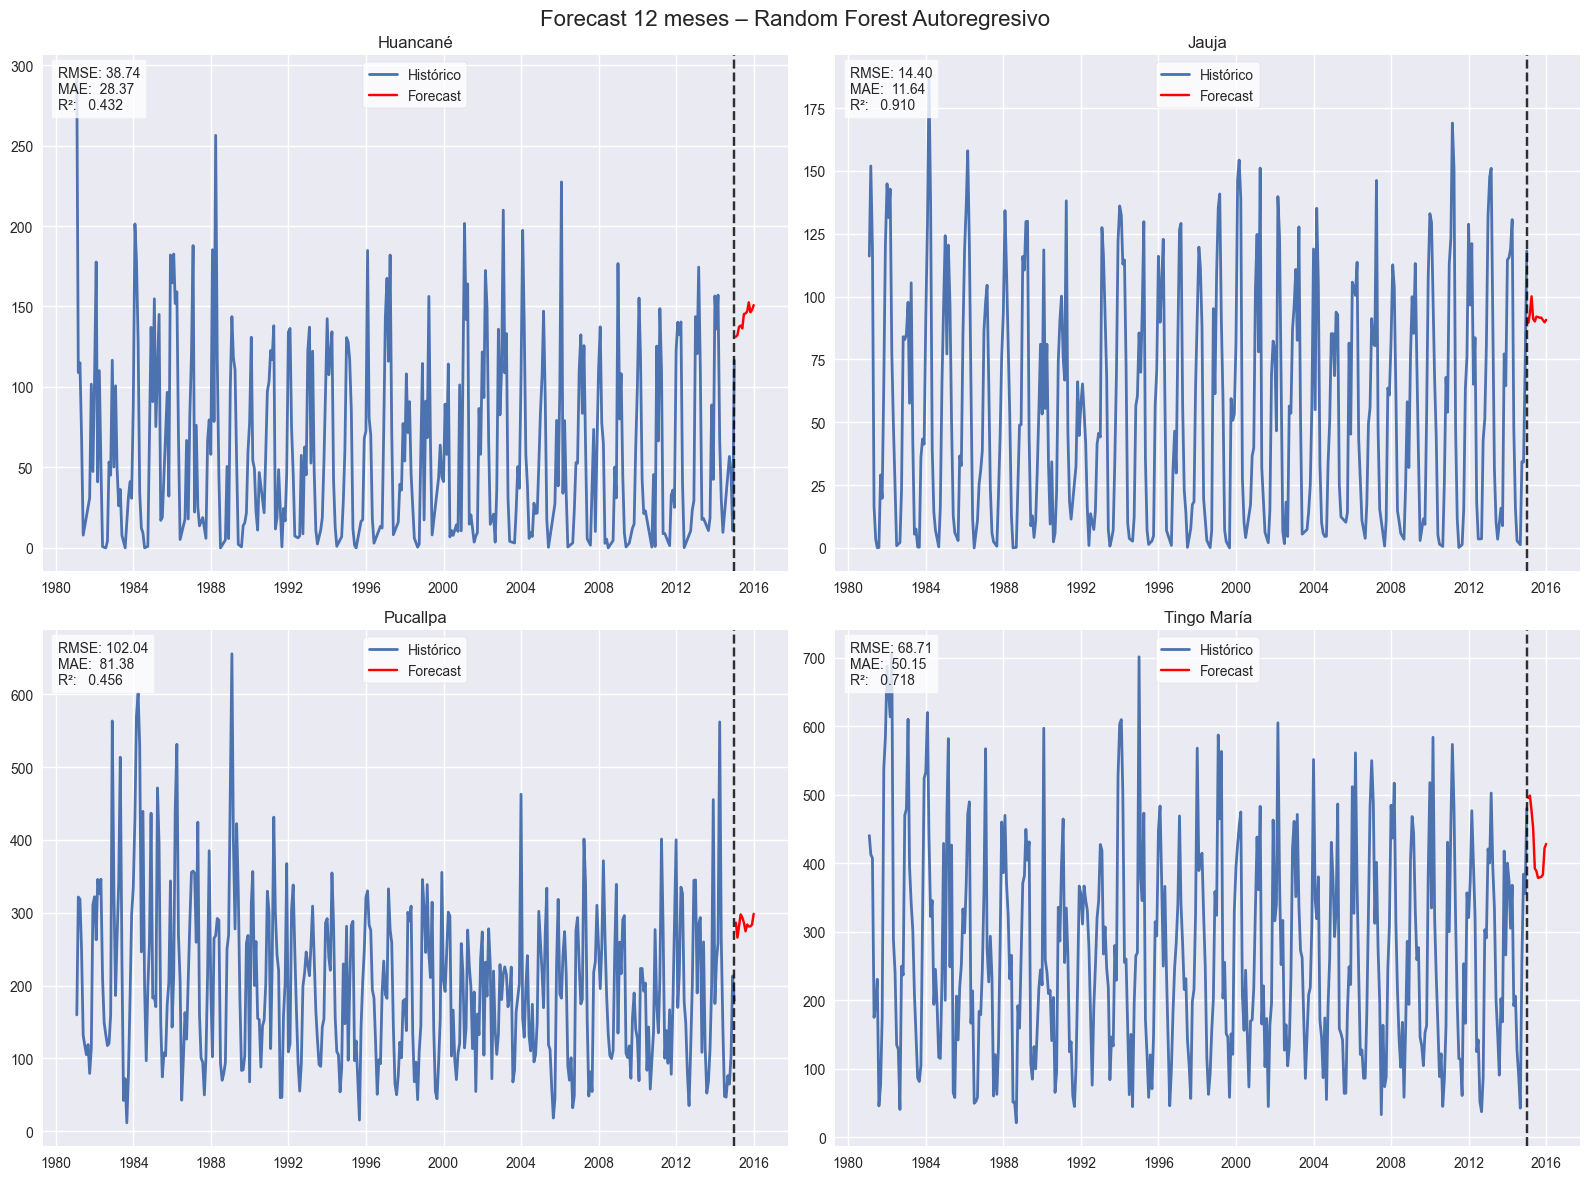

              Huancané       Jauja    Pucallpa  Tingo María
2015-01-31  131.205765   89.594773  286.260176   495.369375
2015-02-28  132.221026   93.377259  265.778617   498.830907
2015-03-31  137.405752  100.074873  281.763754   476.404066
2015-04-30  138.121378   91.097293  297.646989   451.214095
2015-05-31  136.373597   90.080301  293.511332   392.628362
2015-06-30  145.284336   91.978818  286.181500   388.533166
2015-07-31  145.670051   91.863057  274.524143   378.619122
2015-08-31  146.890982   91.555815  283.685563   379.423427
2015-09-30  152.569404   91.601739  281.060315   380.064650
2015-10-31  146.401258   90.642566  281.206752   383.529385
2015-11-30  147.824061   89.768299  283.566706   422.078626
2015-12-31  150.838569   90.713707  298.345177   428.205553


In [70]:
# ==============================
# Figura general con 4 subplots
# ==============================
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.ravel()   # para iterar más fácil
i = 0
forecast_all = {}

for est, data in estaciones.items():
    print(f"\n=== Estación: {est} ===")
    
    df = pd.concat([data["CHIRPS"], data["SENAMHI"], data["ERA5"]], axis=1)
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
    df = df.replace(0, np.nan).dropna().sort_index()
    
    # Crear lags
    for lag in range(1, max_lag + 1):
        df[f"SENAMHI_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)
    
    df_lag = df.dropna()
    
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]
    
    train_size = len(df_lag) - 12
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    
    rf = RandomForestRegressor(n_estimators=600, random_state=42)
    rf.fit(X_train, y_train)
    
    # Métricas
    y_pred_test = rf.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae  = mean_absolute_error(y_test, y_pred_test)
    r2   = r2_score(y_test, y_pred_test)
    
    # Forecast autoregresivo
    last_row = df_lag.iloc[-1].copy()
    preds = []
    
    for h in range(1, forecast_horizon + 1):
        new_x = last_row.drop(labels=["SENAMHI"]).values.reshape(1, -1)
        pred = rf.predict(new_x)[0]
        preds.append(pred)
        
        # actualizar lags
        for lag in range(max_lag, 1, -1):
            last_row[f"SENAMHI_lag{lag}"] = last_row[f"SENAMHI_lag{lag-1}"]
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]
        
        last_row["SENAMHI_lag1"] = pred
        last_row["CHIRPS_lag1"] = last_row["CHIRPS"]
        last_row["ERA5_lag1"] = last_row["ERA5"]
    
    forecast_index = [df_lag.index[-1] + pd.DateOffset(months=h)
                      for h in range(1, forecast_horizon + 1)]
    forecast_series = pd.Series(preds, index=forecast_index)
    forecast_all[est] = forecast_series
    
    # ================
    # Subplot
    # ================
    ax = axs[i]
    i += 1
    
    ax.plot(df.index, df["SENAMHI"], label="Histórico", linewidth=2)
    ax.plot(forecast_series.index, forecast_series, label="Forecast", color="red")
    ax.axvline(df.index[-1], color="k", linestyle="--", alpha=0.8)
    
    # Cuadro con métricas
    texto = (f"RMSE: {rmse:.2f}\n"
             f"MAE:  {mae:.2f}\n"
             f"R²:   {r2:.3f}")
    ax.text(0.02, 0.98, texto,
            transform=ax.transAxes,
            fontsize=10,
            va="top",
            bbox=dict(facecolor="white", alpha=0.8))
    
    ax.set_title(est)
    ax.grid(True)
    ax.legend(frameon=True, facecolor="white", framealpha=0.8)

plt.suptitle("Forecast 12 meses – Random Forest Autoregresivo", fontsize=16)
plt.tight_layout()
plt.show()

# ======================================================
# Tabla con los forecast combinados
# ======================================================
df_forecast = pd.DataFrame(forecast_all)
print(df_forecast)


Test RMSE: 30.385671181200888
Test R²: 0.650222966176149


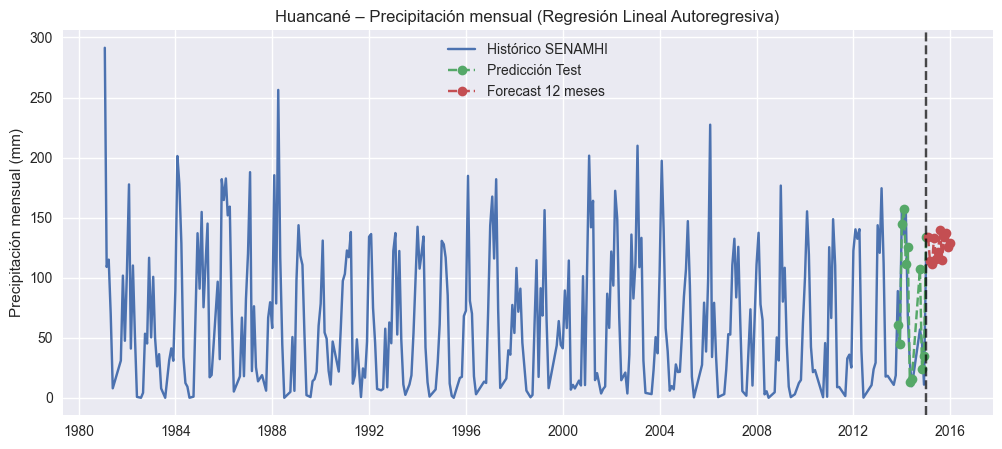

Forecast de los próximos 12 meses:
2015-01-31    133.621588
2015-02-28    113.766251
2015-03-31    110.981193
2015-04-30    133.424874
2015-05-31    115.966980
2015-06-30    121.468127
2015-07-31    139.726833
2015-08-31    114.955374
2015-09-30    134.269521
2015-10-31    137.473745
2015-11-30    125.140533
2015-12-31    128.585348
Name: Forecast_Linear_AR, dtype: float64


In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ===============================
# 1) Dataset original (Huancané)
# ===============================
df = pd.concat([hu_ch, hu_se, hu_er], axis=1)
df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
df = df.replace(0, np.nan).dropna()
df = df.sort_index()

# ===============================
# 2) Crear rezagos (lags)
# ===============================
max_lag = 12  # puedes ajustar 1-12 meses

for lag in range(1, max_lag + 1):
    df[f"SEN_lag{lag}"] = df["SENAMHI"].shift(lag)
    df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
    df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)

df_lag = df.dropna()

# ===============================
# 3) Definir X y y
# ===============================
X = df_lag.drop(columns=["SENAMHI"])
y = df_lag["SENAMHI"]

# ===============================
# 4) División temporal
# ===============================
train_size = len(df_lag) - 12
X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

# ===============================
# 5) Entrenar regresión lineal
# ===============================
model = LinearRegression()
model.fit(X_train, y_train)

# ===============================
# 6) Predicción sobre test
# ===============================
y_pred_test = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2 = r2_score(y_test, y_pred_test)
print("Test RMSE:", rmse)
print("Test R²:", r2)

# ===============================
# 7) Forecast autoregresivo 12 meses
# ===============================
forecast_horizon = 12
last_row = df_lag.iloc[-1].copy()
forecast = []

for i in range(forecast_horizon):
    # preparar fila con los lags actuales
    X_new = last_row.drop(labels=["SENAMHI"]).values.reshape(1, -1)
    
    # predecir
    pred = model.predict(X_new)[0]
    forecast.append(pred)
    
    # actualizar lags para el siguiente mes
    for lag in range(max_lag, 1, -1):
        last_row[f"SEN_lag{lag}"] = last_row[f"SEN_lag{lag-1}"]
        last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
        last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]
    
    # lag1 recibe el valor recién predicho / para CHIRPS y ERA5 usamos persistencia (último valor)
    last_row["SEN_lag1"] = pred
    last_row["CHIRPS_lag1"] = last_row["CHIRPS"]
    last_row["ERA5_lag1"] = last_row["ERA5"]

forecast_index = [df_lag.index[-1] + pd.DateOffset(months=i+1) for i in range(forecast_horizon)]
forecast_series = pd.Series(forecast, index=forecast_index, name="Forecast_Linear_AR")

# ===============================
# 8) Gráfico histórico + forecast
# ===============================
plt.figure(figsize=(12,5))
plt.plot(df.index, df["SENAMHI"], label="Histórico SENAMHI")
plt.plot(y_test.index, y_pred_test, "--o", label="Predicción Test")
plt.plot(forecast_series.index, forecast_series.values, "--o", label="Forecast 12 meses")
plt.axvline(df.index[-1], color="k", linestyle="--", alpha=0.7)
plt.title("Huancané – Precipitación mensual (Regresión Lineal Autoregresiva)")
plt.ylabel("Precipitación mensual (mm)")
plt.grid(True)
plt.legend()
plt.show()

# ===============================
# 9) Mostrar forecast
# ===============================
print("Forecast de los próximos 12 meses:")
print(forecast_series)



=== Estación: Huancané ===


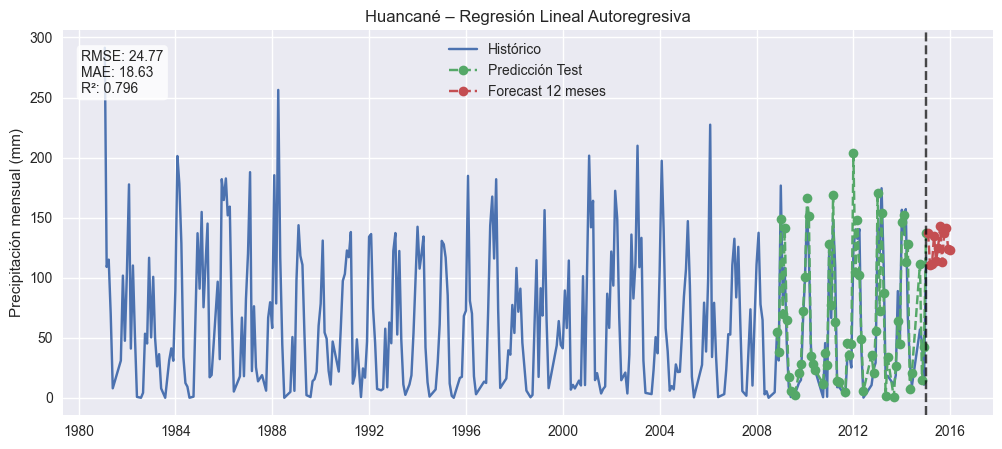


=== Estación: Jauja ===


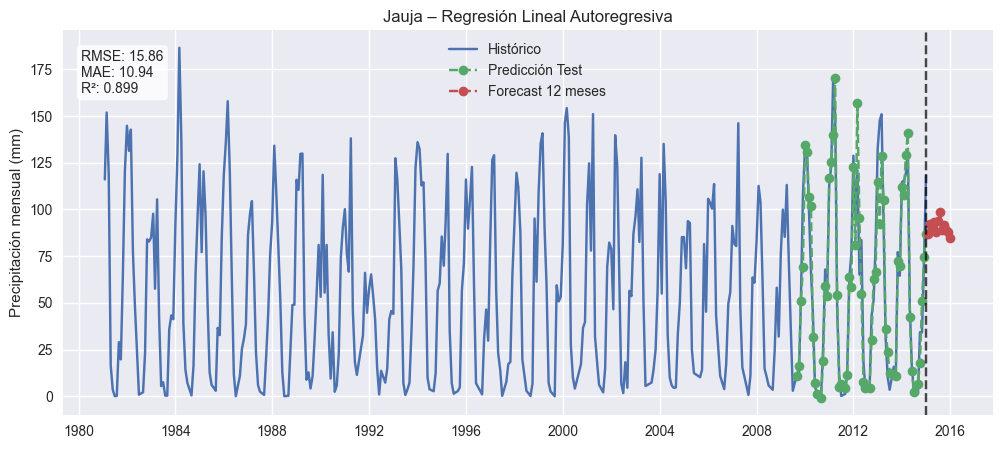


=== Estación: Pucallpa ===


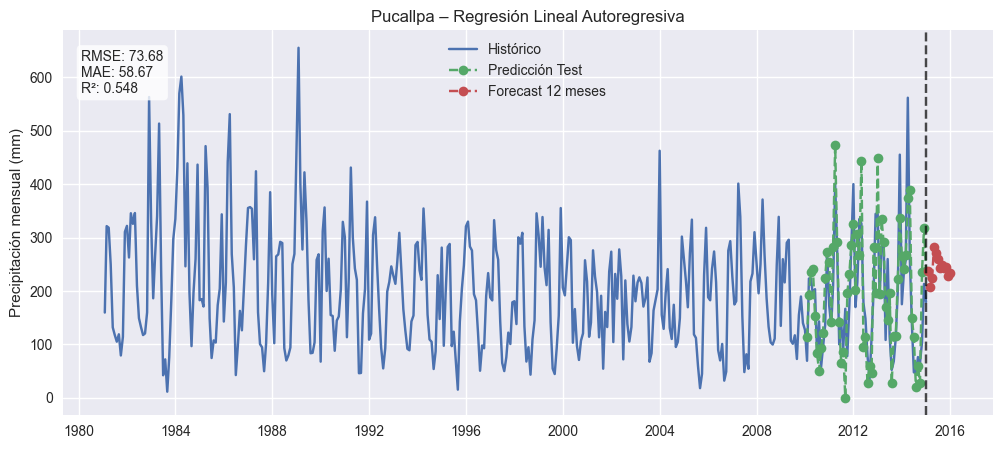


=== Estación: Tingo María ===


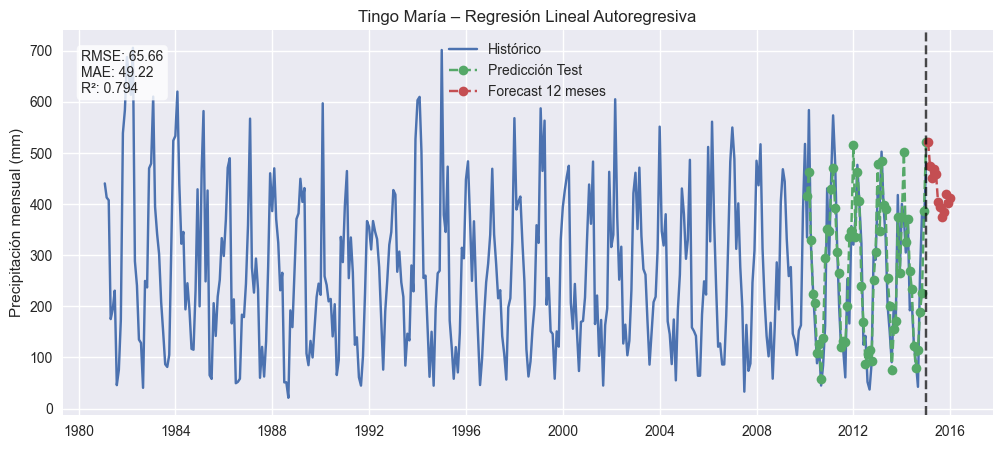

              Huancané      Jauja    Pucallpa  Tingo María
2015-01-31  137.505999  87.094892  237.818283   521.485301
2015-02-28  110.772595  92.363448  206.932241   475.256577
2015-03-31  111.142599  91.359746  223.440494   450.997287
2015-04-30  134.929678  93.457583  282.445536   467.803005
2015-05-31  114.013615  88.209028  270.402965   458.471907
2015-06-30  124.984155  93.778471  260.063277   403.250253
2015-07-31  142.661774  98.565204  242.470876   394.669505
2015-08-31  112.800131  88.791933  248.532184   373.808554
2015-09-30  137.093828  91.580938  243.507938   383.759129
2015-10-31  141.158988  89.058757  244.227610   420.411047
2015-11-30  123.494458  87.766173  228.803751   401.953354
2015-12-31  122.886640  84.601334  233.171033   411.022602


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

# ---------------------------------------------------
# 0) Diccionario con tus series por estación
# ---------------------------------------------------
estaciones = {
    "Huancané": {"CHIRPS": hu_ch, "SENAMHI": hu_se, "ERA5": hu_er},
    "Jauja":    {"CHIRPS": ja_ch, "SENAMHI": ja_se, "ERA5": ja_er},
    "Pucallpa": {"CHIRPS": pu_ch, "SENAMHI": pu_se, "ERA5": pu_er},
    "Tingo María": {"CHIRPS": tm_ch, "SENAMHI": tm_se, "ERA5": tm_er},
}

# ---------------------------------------------------
# Parámetros
# ---------------------------------------------------
max_lag = 12        # número de rezagos
forecast_horizon = 12  # meses a predecir
test_months = 60       # últimos 5 años para test

# Diccionario para guardar forecast de cada estación
forecast_all = {}

# ---------------------------------------------------
# Loop por cada estación
# ---------------------------------------------------
for est, data in estaciones.items():
    print(f"\n=== Estación: {est} ===")
    
    # 1) Crear DataFrame
    df = pd.concat([data["CHIRPS"], data["SENAMHI"], data["ERA5"]], axis=1)
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
    df = df.replace(0, np.nan).dropna()
    df = df.sort_index()
    
    # 2) Crear lags
    for lag in range(1, max_lag + 1):
        df[f"SEN_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)
    
    df_lag = df.dropna()
    
    # 3) X, y
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]
    
    # 4) Split train-test
    train_size = len(df_lag) - test_months
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    
    # 5) Entrenar regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 6) Predicción test
    y_pred_test = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))  # RMSE
    mae  = mean_absolute_error(y_test, y_pred_test)          # MAE
    r2   = r2_score(y_test, y_pred_test)                    # R²

    # 7) Forecast autoregresivo 12 meses
    last_row = df_lag.iloc[-1].copy()
    forecast = []
    
    for i in range(forecast_horizon):
        X_new = last_row.drop(labels=["SENAMHI"]).values.reshape(1, -1)
        pred = model.predict(X_new)[0]
        forecast.append(pred)
        
        # actualizar lags
        for lag in range(max_lag, 1, -1):
            last_row[f"SEN_lag{lag}"] = last_row[f"SEN_lag{lag-1}"]
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]
        
        last_row["SEN_lag1"] = pred
        last_row["CHIRPS_lag1"] = last_row["CHIRPS"]
        last_row["ERA5_lag1"] = last_row["ERA5"]
    
    forecast_index = [df_lag.index[-1] + pd.DateOffset(months=i+1) for i in range(forecast_horizon)]
    forecast_series = pd.Series(forecast, index=forecast_index, name=f"{est}_Forecast")
    
    # guardar forecast
    forecast_all[est] = forecast_series
    
    # 8) Gráfico histórico + test + forecast con RMSE y R²
    plt.figure(figsize=(12,5))
    plt.plot(df.index, df["SENAMHI"], label="Histórico")
    plt.plot(y_test.index, y_pred_test, "--o", label="Predicción Test")
    plt.plot(forecast_series.index, forecast_series.values, "--o", label="Forecast 12 meses")
    plt.axvline(df.index[-1], color="k", linestyle="--", alpha=0.7)

    # Añadir cuadro con métricas
    textstr = f'RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.3f}'
    plt.gca().text(0.02, 0.95, textstr, transform=plt.gca().transAxes,
                fontsize=10, verticalalignment='top', horizontalalignment='left',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))


    plt.title(f"{est} – Regresión Lineal Autoregresiva")
    plt.ylabel("Precipitación mensual (mm)")
    plt.grid(True)
    plt.legend()
    plt.show()


# ---------------------------------------------------
# 9) Todos los forecast juntos en un DataFrame
# ---------------------------------------------------
df_forecast = pd.DataFrame(forecast_all)
print(df_forecast)



=== Estación: Huancané ===

=== Estación: Jauja ===

=== Estación: Pucallpa ===

=== Estación: Tingo María ===


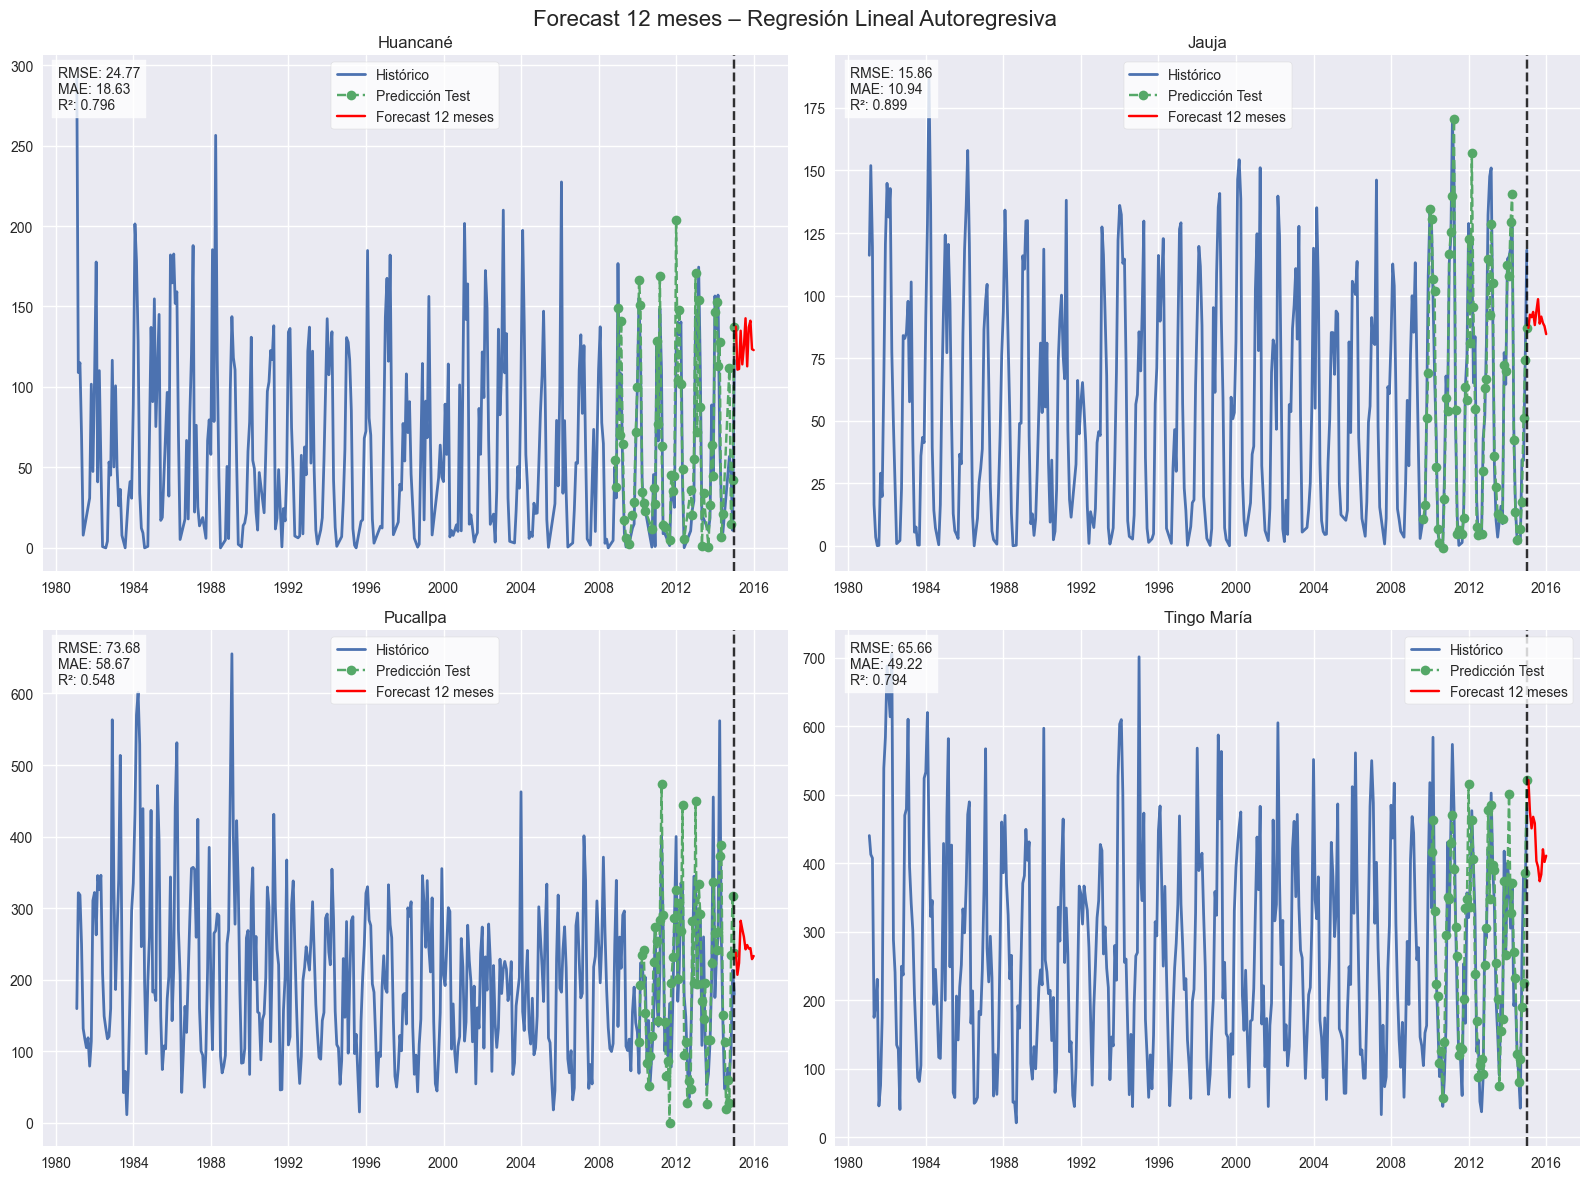

              Huancané      Jauja    Pucallpa  Tingo María
2015-01-31  137.505999  87.094892  237.818283   521.485301
2015-02-28  110.772595  92.363448  206.932241   475.256577
2015-03-31  111.142599  91.359746  223.440494   450.997287
2015-04-30  134.929678  93.457583  282.445536   467.803005
2015-05-31  114.013615  88.209028  270.402965   458.471907
2015-06-30  124.984155  93.778471  260.063277   403.250253
2015-07-31  142.661774  98.565204  242.470876   394.669505
2015-08-31  112.800131  88.791933  248.532184   373.808554
2015-09-30  137.093828  91.580938  243.507938   383.759129
2015-10-31  141.158988  89.058757  244.227610   420.411047
2015-11-30  123.494458  87.766173  228.803751   401.953354
2015-12-31  122.886640  84.601334  233.171033   411.022602


In [73]:
# =========================================
# Figura con los 4 subplots
# =========================================
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.ravel()  # para iterar fácilmente
forecast_all = {}
i = 0

for est, data in estaciones.items():
    print(f"\n=== Estación: {est} ===")
    
    df = pd.concat([data["CHIRPS"], data["SENAMHI"], data["ERA5"]], axis=1)
    df.columns = ["CHIRPS", "SENAMHI", "ERA5"]
    df = df.replace(0, np.nan).dropna()
    df = df.sort_index()
    
    # Crear lags
    for lag in range(1, max_lag + 1):
        df[f"SEN_lag{lag}"] = df["SENAMHI"].shift(lag)
        df[f"CHIRPS_lag{lag}"] = df["CHIRPS"].shift(lag)
        df[f"ERA5_lag{lag}"] = df["ERA5"].shift(lag)
    
    df_lag = df.dropna()
    
    # Variables X y y
    X = df_lag.drop(columns=["SENAMHI"])
    y = df_lag["SENAMHI"]
    
    # Train-test
    train_size = len(df_lag) - test_months
    X_train, X_test = X.iloc[:train_size], X.iloc[train_size:]
    y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]
    
    # Modelo
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predicción test y métricas
    y_pred_test = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae  = mean_absolute_error(y_test, y_pred_test)
    r2   = r2_score(y_test, y_pred_test)
    
    # Forecast autoregresivo
    last_row = df_lag.iloc[-1].copy()
    forecast = []
    
    for h in range(forecast_horizon):
        X_new = last_row.drop(labels=["SENAMHI"]).values.reshape(1, -1)
        pred = model.predict(X_new)[0]
        forecast.append(pred)
        
        # actualizar lags
        for lag in range(max_lag, 1, -1):
            last_row[f"SEN_lag{lag}"] = last_row[f"SEN_lag{lag-1}"]
            last_row[f"CHIRPS_lag{lag}"] = last_row[f"CHIRPS_lag{lag-1}"]
            last_row[f"ERA5_lag{lag}"] = last_row[f"ERA5_lag{lag-1}"]
        
        last_row["SEN_lag1"] = pred
        last_row["CHIRPS_lag1"] = last_row["CHIRPS"]
        last_row["ERA5_lag1"] = last_row["ERA5"]
    
    forecast_index = [df_lag.index[-1] + pd.DateOffset(months=h+1) for h in range(forecast_horizon)]
    forecast_series = pd.Series(forecast, index=forecast_index)
    forecast_all[est] = forecast_series
    
    # =========================================
    # Subplot
    # =========================================
    ax = axs[i]
    i += 1
    
    ax.plot(df.index, df["SENAMHI"], label="Histórico", linewidth=2)
    ax.plot(y_test.index, y_pred_test, "--o", label="Predicción Test")
    ax.plot(forecast_series.index, forecast_series, label="Forecast 12 meses", color="red")
    ax.axvline(df.index[-1], color="k", linestyle="--", alpha=0.8)
    
    # Cuadro métricas
    texto = f"RMSE: {rmse:.2f}\nMAE: {mae:.2f}\nR²: {r2:.3f}"
    ax.text(0.02, 0.98, texto,
            transform=ax.transAxes,
            fontsize=10,
            va="top",
            bbox=dict(facecolor="white", alpha=0.8))
    
    ax.set_title(est)
    ax.grid(True)
    ax.legend(frameon=True, facecolor="white", framealpha=0.8)

plt.suptitle("Forecast 12 meses – Regresión Lineal Autoregresiva", fontsize=16)
plt.tight_layout()
plt.show()

# =========================================
# DataFrame con todos los forecast
# =========================================
df_forecast = pd.DataFrame(forecast_all)
print(df_forecast)
